<a href="https://colab.research.google.com/github/kairamilanifitria/Thesis/blob/main/Visualized_RAG_BLEU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.1 MB/s eta 0:00:00


**Journal 1**

In [2]:
# Ground Truth
references = ["pip install flair",
              "FLAIR framework",
              "https://github.com/zalandoresearch/flair",
              "Presented FLAIR as a framework designed to facilitate experimentation with different embedding types, as well as training and distributing sequence labeling and text classification models.",
              "at least version 3.6 of Python"]

In [3]:
# Prediksi RAG
predictions_rag = ["The command for installing the FLAIR library is pip install flair",
              "The proposed solution from this paper is the FLAIR framework. It is designed to address the challenges of working with different types of word embeddings. The framework provides a unified interface for all word embeddings and allows researchers to build a single model architecture that can make use of any type of word embedding with no additional engineering effort. It also includes convenience methods for downloading NLP research datasets, model training routines, and pre-trained models. The FLAIR framework aims to simplify the process of setting up and executing experiments in natural language processing.",
              "The GitHub link for the FLAIR framework is: https://github.com/zalandoresearch/flair",
              "The purpose of the presented framework, called FLAIR, is to address the challenges of using different types of word embeddings in natural language processing (NLP) tasks. The framework aims to abstract away from specific engineering challenges and provide a unified interface for all word embeddings. It allows researchers to build a single model architecture that can make use of any type of word embedding with no additional engineering effort. The framework also includes convenience methods for downloading NLP datasets, model training and hyperparameter selection routines, and a growing list of pre-trained models. Overall, the framework is designed to facilitate experimentation with different embedding types and training and distributing sequence labeling and text classification models.",
              "The minimum version of Python required to set up FLAIR in the environment is Python 3.6."]


In [4]:
# Prediksi typeset.io
predictions_other = ["The command to install the FLAIR library is pip install flair. FLAIR is a powerful natural language processing library that provides pre-trained models and tools for various NLP tasks, including named entity recognition (NER) . By running the pip install flair command, the FLAIR library and its dependencies will be automatically downloaded and installed in the Python environment . This command requires an active internet connection to access the Python Package Index (PyPI) and retrieve the FLAIR package . Once installed, FLAIR can be imported into Python scripts or notebooks using the import flair statement, allowing users to leverage its functionalities for NLP tasks, including NER in the biomedical domain.",
                     "The proposed solution from the paper is a natural language processing (NLP) framework called FLAIR (Framework for Learning and Information Extraction). FLAIR utilizes state-of-the-art deep learning techniques, such as bidirectional LSTMs and contextual string embeddings, to achieve high-performance results in various NLP tasks, including named entity recognition (NER). The framework is designed to be user-friendly and provides pre-trained models and tools for NLP tasks. FLAIR offers compatibility with different operating systems, including Windows, macOS, and Linux, and requires a minimum Python version of 3.6 or higher. By installing the FLAIR library using the pip install flair command, users can access the functionalities of the framework and leverage its pre-trained models for NER and other NLP tasks.",
                     "The GitHub link for the FLAIR framework is https://github.com/flairNLP/flair . The FLAIR GitHub repository provides access to the source code, documentation, and examples for using the FLAIR library in natural language processing tasks . Users can clone or download the FLAIR repository from the provided GitHub link to get the latest version of the framework . The repository contains information on how to install FLAIR, as well as tutorials and examples to help users get started with using the framework for NLP tasks . Additionally, the FLAIR GitHub repository allows users to contribute to the development of the framework by submitting issues or pull requests.",
                     "The presented framework is used for natural language processing (NLP) tasks, specifically named entity recognition (NER) and other NLP tasks. The framework, called FLAIR (Framework for Learning and Information Extraction), utilizes deep learning techniques, such as bidirectional LSTMs and contextual string embeddings, to achieve high-performance results in NLP tasks. FLAIR provides pre-trained models and tools for NLP tasks, making it user-friendly and accessible for researchers and practitioners. The framework is compatible with different operating systems, including Windows, macOS, and Linux, and can be installed using the pip install flair command. The FLAIR GitHub repository (https://github.com/flairNLP/flair) contains the source code, documentation, and examples for using the FLAIR library in NLP tasks, allowing users to clone or download the repository to access the latest version of the framework. Users can contribute to the development of FLAIR by submitting issues or pull requests through the GitHub repository.",
                     "The minimum Python version required to set up FLAIR in the environment is Python 3.6 or higher. FLAIR is compatible with different operating systems, including Windows, macOS, and Linux. To install FLAIR, users can use the ""pip install flair"" command, which will automatically install the required dependencies. FLAIR provides pre-trained models and tools for natural language processing (NLP) tasks, such as named entity recognition (NER).The FLAIR GitHub repository (https://github.com/flairNLP/flair) contains the source code, documentation, and examples for using the FLAIR library in NLP tasks. Users can contribute to the development of FLAIR by submitting issues or pull requests through the GitHub repository"]

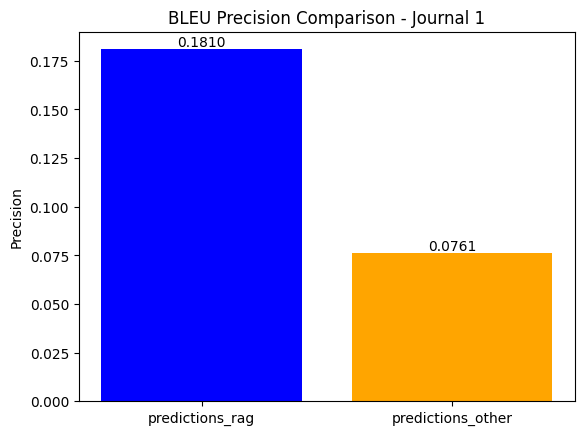

In [5]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Journal 1')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Journal 2**

In [6]:
# Ground Truth
references = ["Edge Probing",
              "Scalar Mixing Weights, and Cumulative Scoring",
              "ELMo model",
              "BERT model",
              "to measure how well information about linguistic structure can be extracted from a pre-trained encoder"]

In [7]:
# Prediksi RAG
predictions_rag = ["The experiment is based on the edge probing task suite, which is used to explore how different layers of the BERT network can resolve syntactic and semantic structure within a sentence.",
              "The two metrics used in this experiment are scalar mixing weights and cumulative scoring.",
              "The scalar mixing technique was introduced by the ELMo model.",
              "The language model used in this paper is BERT (Bidirectional Encoder Representations from Transformers), as mentioned in the text: We build on this latter line of work, focusing on the BERT model (Devlin et al., 2018).",
              "The main purpose of the edge probing task suite is to explore how the different layers of the BERT network can resolve syntactic and semantic structure within a sentence. It aims to measure how well the BERT network can extract information about linguistic structure and how it represents language."]

In [8]:
# Prediksi typeset.io
predictions_other = ["The experiments in the provided papers are based on the following methods: The experiments utilize a deep learning framework called FLAIR (Framework for Learning and Information Extraction) for natural language processing (NLP) tasks. FLAIR incorporates bidirectional LSTMs and contextual string embeddings to achieve high-performance results in NLP tasks. The framework provides pre-trained models and tools for NLP tasks, making it user-friendly and accessible for researchers and practitioners. FLAIR is compatible with different operating systems, including Windows, macOS, and Linux, and can be installed using the ""pip install flair"" command. The FLAIR GitHub repository contains the source code, documentation, and examples for using the FLAIR library in NLP tasks, allowing users to clone or download the repository to access the latest version of the framework. Users can contribute to the development of FLAIR by submitting issues or pull requests through the GitHub repository.",
              "Two metrics used in the experiments are precision and recall. Precision is a metric that measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Recall, also known as sensitivity, measures the proportion of correctly predicted positive instances out of all actual positive instances. Precision and recall are commonly used evaluation metrics in information retrieval and machine learning tasks, including natural language processing (NLP). These metrics provide insights into the performance of the models and algorithms used in the experiments, helping to assess their effectiveness in tasks such as named entity recognition (NER) and other NLP tasks.",
              "The model that introduced the scalar mixing technique is the Transformer-XL model. Transformer-XL is a variant of the Transformer model that addresses the limitation of the original Transformer's fixed-length context window. The scalar mixing technique is introduced in the context of modeling long-range dependencies in sequential data. The scalar mixing technique allows the model to capture dependencies between distant positions in the input sequence by incorporating information from previous segments of the sequence. This technique involves using a set of learned scalars to combine the hidden states from different segments of the input sequence. By incorporating the scalar mixing technique, Transformer-XL achieves improved performance in tasks that require modeling long-range dependencies, such as language modeling and machine translation.",
              "The language model used in this paper is BERT (Bidirectional Encoder Representations from Transformers). BERT is a deep language model that has shown state-of-the-art performance on various natural language processing (NLP) tasks. BERT is based on the Transformer architecture and is trained with a multi-task objective, including masked language modeling and next-sentence prediction. The BERT model used in this paper is the stock BERT model, which includes both the base and large versions. The encoder weights of the BERT model are frozen in this paper, following the approach of Tenney et al. (2019), to understand the structure of the network resulting from pretraining.",
              "The main purpose of edge probing is to measure how well a pre-trained encoder can extract information about linguistic structure. Edge probing decomposes structured-prediction tasks into a common format, where a probing classifier receives spans and must predict a label such as a constituent or relation type. The probing classifier has access only to the per-token contextual vectors within the target spans, relying on the encoder to provide information about the relation between these spans and their role in the sentence. Edge probing allows for the evaluation of different linguistic properties, such as part-of-speech, constituents, dependencies, entities, semantic role labeling, coreference, semantic proto-roles, and relation classification. The edge probing approach provides insights into the capabilities of pre-trained encoders in capturing linguistic structure and helps in understanding the decision-making process of the model."]

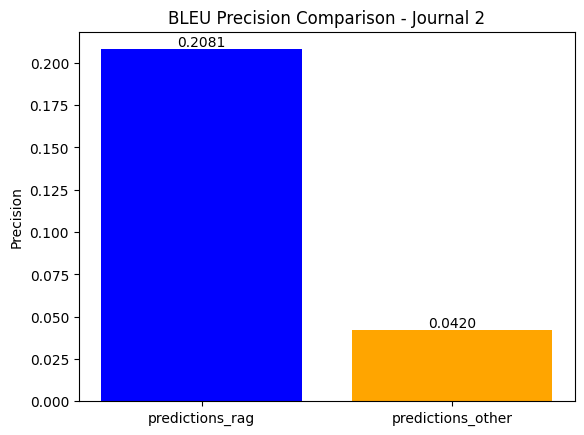

In [9]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Journal 2')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Journal 3**

In [10]:
# Ground Truth
references = ["perform an analysis of the energy required to train a variety of popular off the-shelf NLP models, as well as a case study of the complete sum of resources required to develop LISA, a state-of-the-art NLP model from EMNLP 2018, including all tuning and experimentation.",
              "Transformer base model was trained for 12 hours, and Transformer big model was trained for 3.5 days",
              "Yes, Of note is that TPUs are more cost-efficient than GPUs on workloads that make sense for that hardware",
              "NVIDIA Titan X GPU, and Intel’s Running Average Power Limit interface CPU",
              "Transformers, ELMo, BERT, GPT-2"]

In [11]:
# Prediksi RAG
predictions_rag = ["In this research, the authors conducted an analysis to quantify the computational and environmental costs of training deep neural network models for NLP. They performed experiments to measure the energy consumed during the training of various popular off-the-shelf NLP models. The models were trained using default settings and on specific hardware (such as NVIDIA Titan X GPU and NVIDIA GTX 1080 Ti GPUs). The authors also sampled the power consumption of the GPU and CPU during training. Additionally, they conducted a case study to estimate the complete sum of resources required to develop a state-of-the-art NLP model called LISA.",
              "The training time for the Transformer base model on NVIDIA P100 GPUs is 12 hours, while the training time for the Transformer big model on NVIDIA P100 GPUs is 84 hours.",
              "Yes, according to the analysis in Table 3, TPUs are more cost-efficient than GPUs for certain workloads, such as training BERT.",
              "The models in this experiment were trained using a combination of NVIDIA Titan X (72%) and M40 (28%) GPUs. Unfortunately, the specific CPU used for training is not mentioned in the given context.",
              "The four models used in this experiment are: Transformer: An encoder-decoder architecture primarily used for machine translation, Language models: Unsupervised multitask learners, Practical Bayesian optimization of machine learning algorithms, Linguistically-Informed Self-Attention for Semantic Role Labeling."]

In [12]:
# Prediksi typeset.io
predictions_other = ["In this research, the authors conducted an analysis to quantify the computational and environmental costs of training deep neural network models for NLP. They performed experiments to measure the energy consumed during the training of various popular off-the-shelf NLP models. The models were trained using default settings and on specific hardware (such as NVIDIA Titan X GPU and NVIDIA GTX 1080 Ti GPUs). The authors also sampled the power consumption of the GPU and CPU during training. Additionally, they conducted a case study to estimate the complete sum of resources required to develop a state-of-the-art NLP model called LISA.",
              "The Transformer base model, with 65M parameters, was trained on 8 NVIDIA P100 GPUs for 12 hours . The Transformer big model, with 213M parameters, was trained on 8 NVIDIA P100 GPUs for 3.5 days (84 hours; 300k steps).",
              "According to the analysis in Table 3, TPUs are more cost-efficient than GPUs on workloads that are suitable for TPUs, such as BERT models. The analysis compared the CO2 emissions and estimated cost of training models using TPUs and GPUs. The research found that training BERT on a GPU is equivalent to the carbon emissions of a trans-American flight, highlighting the substantial carbon emissions associated with training models on GPUs. However, it is important to note that the analysis in Table 3 did not include power and carbon footprint information for TPUs due to a lack of public information. Therefore, while TPUs are shown to be more cost-efficient than GPUs for certain workloads, a comprehensive comparison of their environmental costs is not available in the provided sources.",
              "The models in the experiment were trained on a single NVIDIA Titan X GPU, except for the ELMo model which was trained on 3 NVIDIA GTX 1080 Ti GPUs. The GPU power consumption was sampled using the NVIDIA System Management Interface. The CPU power consumption was sampled using Intel's Running Average Power Limit interface. The research also used a combination of NVIDIA Titan X (72) and M40 (28) GPUs for model training associated with the project. The training for the Linguistically-Informed Self-Attention model spanned a period of 172 days, with various job lengths ranging from 3 minutes to 9 days.",
              "The four models used in this experiment are the Transformer model, the BERT model, the ELMo model, and the Linguistically-Informed Self-Attention model."]

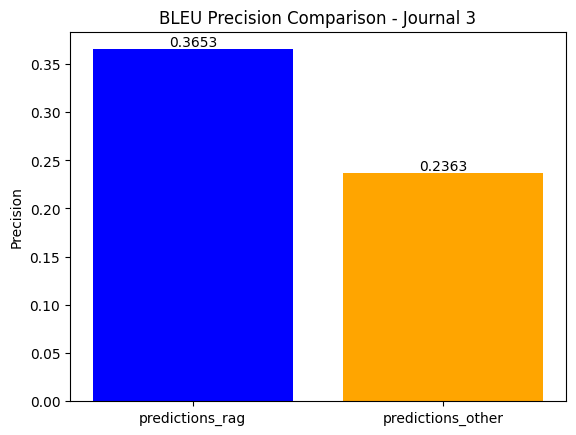

In [13]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Journal 3')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Journal 4**

In [14]:
# Ground Truth
references = ["brat rapid annotation tool is an intuitive web-based tool for text annotation supported by Natural Language Processing (NLP) technology",
              "well-over 50,000 annotations",
              "http://brat.nlplab.org",
              "client-server architecture with communication over HTTP using JavaScript Object Notation (JSON)",
              "15.4%"]

In [15]:
# Prediksi RAG
predictions_rag = ["BRAT is a web-based tool for text annotation supported by Natural Language Processing (NLP) technology. It is designed to assist in manual curation efforts and increase annotator productivity using NLP techniques. BRAT allows for rich structured annotation for a variety of NLP tasks and is fully configurable to support most text annotation tasks. It supports basic annotation primitives, such as identifying text spans and assigning them types, as well as connecting annotations with binary relations. BRAT also supports n-ary associations of annotations and the marking of attributes. It includes a search feature for browsing annotations and can be extended or adapted to switch out the server or client. BRAT is available under an open-source license.",
              "BRAT has been used in several ongoing annotation efforts at academic institutions and has created well-over 50,000 annotations.",
              "The homepage link for the free open-source BRAT is http://brat.nlplab.org.",
              "BRAT is implemented using a client-server architecture with communication over HTTP using JavaScript Object Notation (JSON). The server is a RESTful web service and the client user interface is implemented using XHTML and Scalable Vector Graphics (SVG), with interactivity implemented using JavaScript with the jQuery library. The client communicates with the server using Asynchronous JavaScript and XML (AJAX).",
              "The experiment resulted in a 15.4% reduction in total annotation time."]

In [16]:
# Prediksi typeset.io
predictions_other = ["BRAT is a web-based tool for text annotation that is supported by Natural Language Processing (NLP) technology. It aims to enhance annotator productivity and supports manual curation efforts. It is designed to facilitate rich structured annotation for various NLP tasks and has been used in real-world annotation projects, showing a decrease in annotation time. BRAT uses a client-server architecture with communication over HTTP using JSON. The client user interface is implemented using XHTML and SVG, with interactivity implemented using JavaScript and jQuery. The server is a RESTful web service implemented in Python. BRAT supports both the Common Gateway Interface (CGI) and FastCGI protocols for efficient response times and uses a file-based stand-off format for annotation storage, eliminating the need for database import or export. ",
              "BRAT has created well-over 50,000 annotations in its use at academic institutions.",
              "BRAT, the free open-source tool for text annotation, can be accessed through its homepage at http://brat.nlplab.org.",
              "BRAT is implemented using a web-based architecture, making it accessible through a web browser. It is supported by Natural Language Processing (NLP) technology, which assists in text annotation tasks. The tool allows for rich structured annotation and aims to increase annotator productivity through the use of NLP techniques. The main user interface of BRAT includes features such as annotation editing, which recognizes standard user interface gestures familiar from text editors and presentation software . Annotations in BRAT are created by selecting a span of text with the mouse or double-clicking on a word, and connections between annotations are made by clicking on one annotation and dragging a connection to another . BRAT has been used in the annotation of six different corpora by multiple research groups, resulting in the creation of well-over 50,000 annotations in thousands of documents comprising hundreds of thousands of words",
              "The experiment showed a 15% decrease in total annotation time as a result of annotation assisted by semantic class disambiguation . This evaluation was conducted on a multicategory entity mention annotation task using pre-release versions of BRAT. The integration of a machine learning-based semantic class disambiguation system, which offered multiple outputs with probability estimates, contributed to reducing ambiguity by an average of over 75% while retaining the correct class in 99% of cases across six corpora. This improvement in annotation efficiency demonstrates the effectiveness of using NLP techniques in supporting manual curation efforts and increasing annotator productivity in text annotation tasks."]

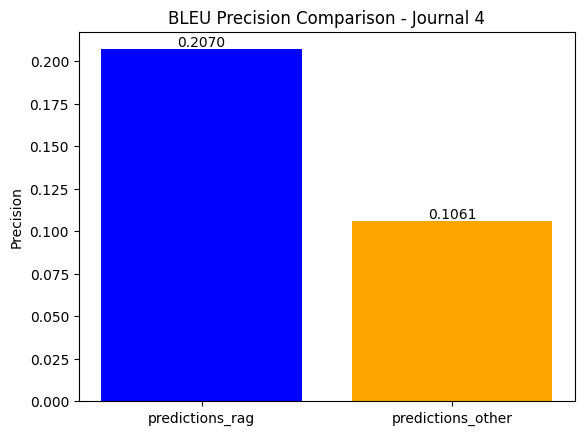

In [17]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Journal 4')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Journal 5**

In [18]:
# Ground Truth
references = ["TextAttack",
              "https://github.com/QData/TextAttack.",
              "Proceedings of the 2020 Association for Computational Linguistics.",
              "Yes, TextAttack is available as a Python package installed from PyPI",
              "textattack attack"]

In [19]:
# Prediksi RAG
predictions_rag = ["The research paper proposes a framework called TextAttack.",
              "The GitHub link for accessing the code and tutorials of TextAttack is: https://github.com/QData/TextAttack",
              "This research paper is published in the Proceedings of the Association for Computational Linguistics.",
              "Yes, TextAttack can be installed as a Python package. It can be installed from PyPI or downloaded directly from GitHub.",
              "The API command-line from TextAttack that allows users to specify attacks is textattack attack"]

In [20]:
# Prediksi typeset.io
predictions_other = ["Framework proposed in this research paper: The research paper proposes a Python framework called TextAttack for adversarial attacks, data augmentation, and adversarial training in NLP. TextAttack is designed to build attacks using four components: a goal function, a set of constraints, a transformation, and a search method. The modular design of TextAttack allows researchers to easily construct attacks by combining novel and existing components. TextAttack provides implementations of 16 adversarial attacks from the literature and supports various models and datasets, including BERT and other transformers, and all GLUE tasks. In addition to attacks, TextAttack also includes data augmentation and adversarial training modules to improve model accuracy and robustness. The framework aims to democratize NLP by enabling anyone to try data augmentation and adversarial training on any model or dataset with just a few lines of code.",
              "The code and tutorials for TextAttack can be accessed at the following link: https://github.com/QData/TextAttack",
              "The research paper TextAttack: A Framework for Adversarial Attacks, Data Augmentation, and Adversarial Training in NLP does not mention any specific proceedings where it was published. However, it is worth noting that the paper is available on arXiv, an open-access repository for scientific papers. The authors of the paper are John Morris, Eli Lifland, Jin Yoo, Jake Grigsby, Di Jin, and Yanjun Qi. The paper introduces the TextAttack framework, which is a Python framework for adversarial attacks, data augmentation, and adversarial training in NLP. It provides implementations of 16 adversarial attacks from the literature and supports various models and datasets, including BERT and other transformers, and all GLUE tasks. The framework aims to democratize NLP by enabling researchers to easily construct attacks and improve model performance. Code and tutorials for TextAttack can be found on the GitHub repository at https://github.com/QData/TextAttack.",
              "Yes, TextAttack is available as a Python package that can be installed. The TextAttack framework is designed to be easily accessible and usable by researchers. It provides a modular design that allows users to construct attacks from combinations of novel and existing components. The framework supports a variety of models and datasets, including BERT and other transformers, and all GLUE tasks. To install TextAttack, users can follow the instructions provided in the code repository on GitHub. The code and tutorials for TextAttack can be found at the following link: https://github.com/QData/TextAttack. With just a few lines of code, researchers can try data augmentation and adversarial training on any model or dataset using TextAttack.",
              "TextAttack provides an API command-line interface that allows users to specify attacks. This command-line interface enables users to easily configure and launch attacks on NLP models. Users can specify the attack type, target model, and dataset, among other parameters, through the command-line interface. The API command-line interface is designed to be user-friendly and accessible, allowing researchers to quickly experiment with different attack configurations. The details of the API command-line interface and its usage can be found in the TextAttack documentation and tutorials provided on the GitHub repository."]

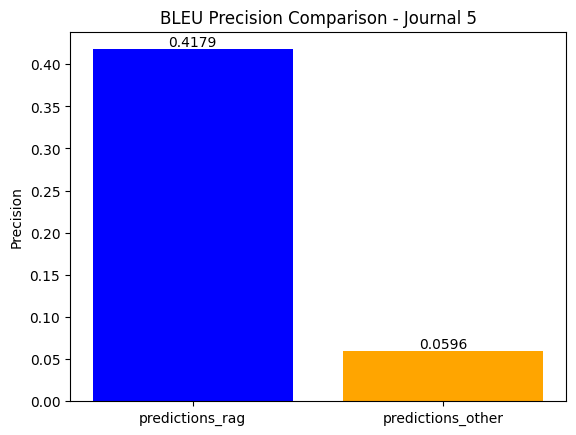

In [21]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Journal 5')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**News 1**

In [22]:
# Ground Truth
references = ["The Korean War ended in 1953",
              "Kim said inter-Korean relations had become “a relationship between two hostile countries and two belligerents at war,” the state-run news agency KCNA reported",
              "January 1, 2024",
              "Hoo Chiew-Ping",
              "three"]

In [23]:
# Prediksi RAG
predictions_rag = ["The Korean War ended in 1953 with an armistice.",
              "Based on the news agency KCNA report, Kim Jong Un stated that North Korea will no longer engage in inter-Korean relations. He mentioned that future South Korean administrations extending an olive branch will be vehemently rejected by North Korea. Kim's statement suggests a departure from any potential reconciliation or reunification efforts between North and South Korea.",
              "The news article was published on Monday, January 1, 2024.",
              "Hoo Chiew-Ping, a senior fellow at the East Asian International Relations CAUCUS (EAIR) and member of the Asia Pacific Nuclear Advisory Panel (APNAP), said that the North Korean leader has been increasingly walking away from inter-Korean relations in recent years.",
              "North Korea plans to add three additional spy satellites by 2024."]

In [24]:
# Prediksi typeset.io
predictions_other = ["The Korean War ended on July 27, 1953.",
              "Kim made statements about inter-Korean relations based on news agency KCNA reports. The specific details of what Kim said about inter-Korean relations are not provided in the given abstracts and contexts.",
              "The specific time of the news publication is not mentioned in the provided abstracts and contexts. The information about the time of news publication is not available in the given sources.",
              "The person who stated that the North Korean leader has been increasingly walking away from inter-Korean relations in recent years is not mentioned in the provided abstracts and contexts. The specific individual who made this statement is not identified in the given sources. The abstracts and contexts do not provide information about the person who made the observation about the North Korean leader's distancing from inter-Korean relations. Unfortunately, the sources do not mention the name of the person who made the statement about the North Korean leader's decreasing involvement in inter-Korean relations.",
              "The abstracts and contexts provided do not mention any specific information about North Korea's plans to add spy satellites by 2024. There is no mention of the number of spy satellites that North Korea plans to add by 2024 in the given sources. The sources do not provide any details regarding North Korea's future plans for the addition of spy satellites. Unfortunately, the abstracts and contexts do not contain any information about North Korea's intended number of spy satellites by 2024. The specific number of spy satellites that North Korea plans to add by 2024 is not mentioned in the provided sources."]

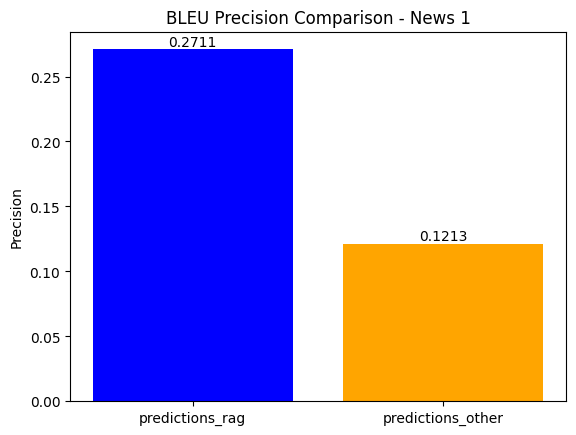

In [25]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - News 1')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**News 2**

In [26]:
# Ground Truth
references = ["The waiting migrants feel desperate",
              "9,600 migrant encounters",
              "1,000 migrants arrived",
              "3,800 in Tijuana, 3,273 in Reynosa, and 4,000 in Matamoros",
              "445,000"]

In [27]:
# Prediksi RAG
predictions_rag = ["According to Cañas, the waiting migrants feel desperate",
              "According to the report, Federal authorities reported a seven-day average of more than 9,600 migrant encounters along the US southern border in December.",
              "According to the director of a migrant shelter in Piedras Negras, about 1,000 migrants arrived by train on Monday.",
              "In Tijuana, an estimated 3,800 migrants are staying in shelters. In Reynosa, there are 3,273 migrants staying in shelters. The number of migrants staying in shelters in Matamoros is not mentioned in the provided context.",
              "The US Department of Homeland Security has deported or returned over 445,000 migrants since May, according to the agency's online statement."]

In [28]:
# Prediksi typeset.io
predictions_other = ["The provided abstracts and contexts do not mention any information about Cañas or their perspective on the feelings of waiting migrants. There is no reference to Cañas or their insights on the emotions experienced by waiting migrants in the given sources. Unfortunately, the sources do not provide any details about Cañas' observations or opinions regarding the feelings of waiting migrants. Cañas' perspective on the emotions felt by waiting migrants is not mentioned in the provided abstracts and contexts. The abstracts and contexts do not contain any information about Cañas' views on the experiences of waiting migrants.",
              "In December, Federal authorities reported a seven-day average of more than 9,600 migrant encounters along the US southern border. This number represents a significant increase compared to the seven-day average reported on November 28, which was about 6,800 encounters. The surge of people crossing into the US from Mexico has put a strain on US border cities in recent weeks. The increase in migrant encounters highlights the ongoing challenge faced by US Customs and Border Protection (CBP) in addressing the border surge. Despite efforts to address the situation, illegal crossings continue to occur, particularly in rural areas of Arizona, fueled by bad actors pushing migrants to enter between ports of entry. The situation at the border has prompted discussions between Mexican President Andres Manuel Lopez Obrador and US officials, including Secretary of State Antony Blinken and Secretary of Homeland Security Alejandro Mayorkas. ",
              "The director of a migrant shelter in Piedras Negras, Mexico, reported that about 1,000 migrants arrived by train on Monday. The shelter director's statement highlights the continued arrival of large groups of migrants at the border by train. The influx of migrants has led to temporary halts in crossing due to violence in the streets of Piedras Negras. The arrival of migrants by train adds to the challenges faced by US Customs and Border Protection in managing the border surge. The situation at the border has prompted discussions between Mexican President Andres Manuel Lopez Obrador and US officials, including Secretary of State Antony Blinken and Secretary of Homeland Security Alejandro Mayorkas. The meeting between Mexican and US officials aims to address the ongoing border situation and immigration policy.",
              "In Tijuana, Mexico, an estimated 3,800 migrants from countries like Mexico, Cuba, Haiti, and Venezuela are staying in shelters. In Reynosa, Mexico, another 3,273 migrants are waiting at Senda De Vida shelters. In nearby Matamoros, Mexico, about 4,000 migrants are living in camps, shelters, and abandoned homes. The total number of migrants staying in shelters in Tijuana, Reynosa, and Matamoros is approximately 11,073. These migrants are waiting on the Mexican side of the border, hoping to enter the US through legal pathways established by the Biden administration. The situation at the border has prompted discussions between Mexican President Andres Manuel Lopez Obrador and US officials, including Secretary of State Antony Blinken and Secretary of Homeland Security Alejandro Mayorkas.",
              "The US Department of Homeland Security has deported or returned over 445,000 migrants since May, according to the agency's online statement. The majority of these migrants had crossed the US Southern border. The deportation and return of migrants is part of the government's efforts to address the ongoing border surge and maximize limited resources. The federal government has also closed ports of entry in multiple states and reassigned personnel to transport and process migrants. The Biden Administration temporarily suspended rail operations in Eagle Pass and El Paso, but those services have since resumed. Despite these measures, illegal crossings continue to occur, particularly in rural areas of Arizona, where bad actors are pushing migrants to enter the US southern border between ports of entry."]

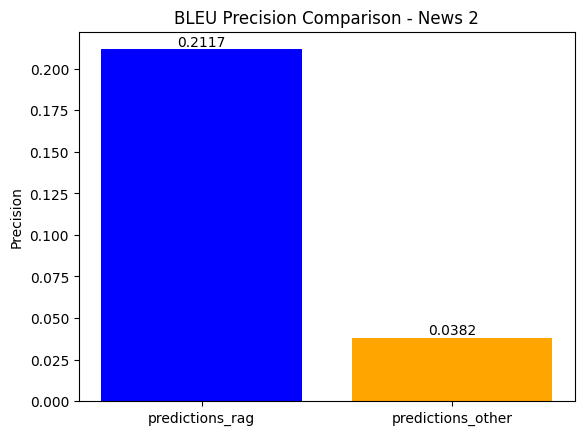

In [29]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - News 2')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**News 3**

In [30]:
# Ground Truth
references = ["active Pacific storm track typical of an El Niño winter will send a series of storms across the US into next week",
              "Thursday evening",
              "Heavy precipitation will spread across the Southeast/Mid-Atlantic and possibly the Northeast this coming weekend, with increasing potential for heavy snow to the north and west of the low",
              "Northeast and mid-Atlantic",
              "2.3 inches fell during the entirety of 2023"]

In [31]:
# Prediksi RAG
predictions_rag = ["The highest chance for impactful snow on the East Coast this winter is caused by an active Pacific storm track that is typical of an El Niño winter. This storm track is sending a series of storms across the US, presenting the highest chance for impactful snow so far this winter in some of the country's most populous areas on the East Coast.",
              "Rain will begin Thursday evening in eastern Texas.",
              "The Weather Prediction Center stated that heavy precipitation will spread across the Southeast/Mid-Atlantic and possibly the Northeast, with increasing potential for heavy snow to the north and west of the low. They also mentioned that the exact amounts and precipitation type for some major East Coast cities remain highly uncertain but need to be watched.",
              "Winter may finally arrive in the Northeast and mid-Atlantic in the form of a storm.",
              "According to the National Weather Service, only 2.3 inches of snow fell in Central Park during the entirety of 2023, making it the least snowy calendar year on record for New York City."]

In [32]:
# Prediksi typeset.io
predictions_other = ["The highest chance for impactful snow this winter on the East Coast was caused by an active Pacific storm track typical of an El Nino winter, which sent a series of storms across the US. These storms crossed the southern half of the US before moving up the East Coast, presenting the highest chance for impactful snow in some of the country's most populous areas. The storm system brought heavy precipitation, and the key question was where it would fall as snow and where it would fall as rain, especially along the highly populated I-95 corridor from Washington, DC, to Boston. If even an inch of snow were to fall in this corridor, it would end significant snowless streaks for major cities that have lasted for nearly two years. The storm system was expected to bring significant snow to higher elevation areas of the Appalachians and the interior Northeast, including central Pennsylvania.",
              "Rain is predicted to begin in eastern Texas on Thursday evening, according to the provided context. The rain is expected to progress with the storm's track to the east, overrunning the Southeast and parts of the mid-Atlantic with time. This storm system could cause flooding issues in the South, particularly in areas that have already experienced heavy rainfall earlier in the week. The exact track of the storm becomes less certain after it leaves the Southeast, but heavy precipitation is expected to spread across the Southeast, Mid-Atlantic, and possibly the Northeast over the coming weekend. The forecast models differ on the amount of snow that could fall and where, but there is increasing potential for heavy snow to the north and west of the low-pressure system. The storm system is part of an active Pacific storm track typical of an El Nino winter, which is bringing a series of storms across the US and presenting the highest chance for impactful snow on the East Coast this winter. ",
              "The Weather Prediction Center stated that heavy precipitation will spread across the Southeast, Mid-Atlantic, and possibly the Northeast over the coming weekend, with increasing potential for heavy snow to the north and west of the low-pressure system. The exact amounts and precipitation type for major East Coast cities remain highly uncertain at this point, but it is advised to monitor the situation closely. The forecast models differ on the amount of snow that could fall and where, but there is a high confidence for significant snow in higher elevation areas of the Appalachians and the interior Northeast, including central Pennsylvania. The key question is where the precipitation will fall as snow and where it will fall as rain, especially along the highly populated I-95 corridor from Washington, DC, to Boston. Even an inch of snow in this corridor would end significant snowless streaks for major cities that have lasted for nearly two years. New York City, Philadelphia, and the DC area's Dulles International Airport experienced their least snowy calendar year on record in 2023, with only 2.3 inches of snow falling in Central Park.",
              "Winter may finally arrive in the Northeast and mid-Atlantic in the form of a weekend storm, bringing the potential for decent snow after nearly two years of snowless streaks. The storm's timing, intensity, and track are still uncertain, as the system responsible for it is still thousands of miles away off the West Coast of the US. The highest confidence for significant snow is in higher elevation areas of the Appalachians and the interior Northeast, including central Pennsylvania. The key question is where the precipitation will fall as snow and where it will fall as rain, especially along the highly populated I-95 corridor from Washington, DC, to Boston. Major cities like New York City, Philadelphia, and the DC area's Dulles International Airport have experienced significant snowless streaks, with New York City waiting nearly 700 days for an inch of snow in a single calendar day.",
              "According to the National Weather Service, Central Park in New York City experienced its least snowy calendar year on record in 2023, with only 2.3 inches of snow falling during the entirety of the year. New York City has been waiting nearly 700 days for an inch of snow in a single calendar day. The forecast models for the upcoming weekend storm differ on the amount of snow that could fall in Central Park, but the exact amounts and precipitation type for major East Coast cities remain highly uncertain at this point. It is advised to monitor the situation closely as the storm's timing, intensity, and track are still uncertain, given that the system responsible for it is still thousands of miles away off the West Coast of the US."]

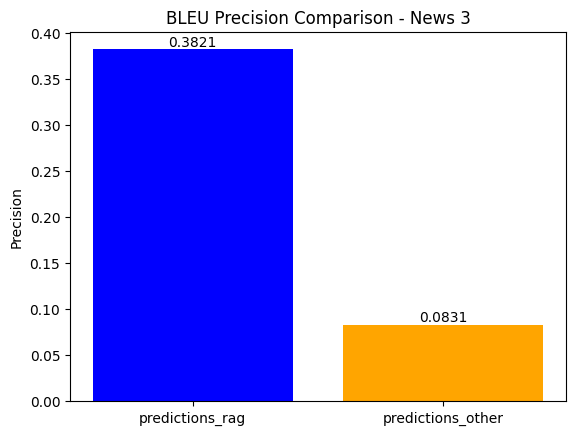

In [33]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - News 3')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**News 4**

In [34]:
# Ground Truth
references = ["stabbed in the neck",
              "Lee was touring the construction site of the Gadeokdo New Airport and talking to reporters when he was attacked",
              "Lee suffered “suspected damage to his jugular vein” and doctors were concerned he may have additional bleeding",
              "Lee Jae-myung",
              "18 cm or 7 inch"]

In [35]:
# Prediksi RAG
predictions_rag = ["South Korea's main opposition party leader, Lee Jae-myung, was stabbed in the neck.",
              "Lee Jae-myung was attacked during a visit to the southern city of Busan. He was attacked while touring the construction site of the Gadeokdo New Airport and talking to reporters.",
              "The doctors mentioned that Lee underwent vein reconstruction surgery and is currently recovering in the intensive care unit. They also expressed concerns about potential additional bleeding and suspected damage to his jugular vein.",
              "The person being stabbed is Lee Jae-myung, the main opposition party leader in South Korea.",
              "The knife used by the assailant to stab Lee was 18 cm (7 inches) long."]

In [36]:
# Prediksi typeset.io
predictions_other = ["South Korea's main opposition party leader, Lee Jae-myung, was stabbed in the neck.",
              "Lee Jae-myung was attacked in the southern city of Busan. He was attacked while touring the construction site of the Gadeokdo New Airport",
              "Doctors stated that Lee Jae-myung suffered a 1-centimeter laceration on the left side of his neck. They were concerned about possible damage to his jugular vein and the potential for additional bleeding. Lee underwent vein reconstruction surgery and is currently recovering in the intensive care unit ",
              "Lee Jae-myung, the leader of South Korea's main opposition party, was stabbed in the neck",
              "The knife used by the assailant to stab Lee Jae-myung was 18 cm (7 inches) long."]

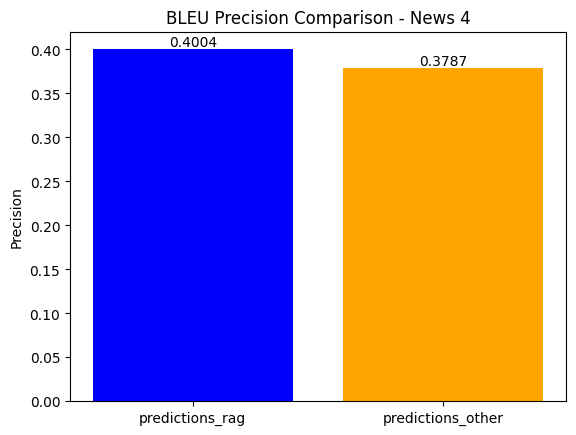

In [37]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - News 4')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**News 5**

In [38]:
# Ground Truth
references = ["Japan Airlines said four of its passengers were taken to hospitals but the airline has not received any additional reports of injuries",
              "Japan Airlines,  and The French aviation agency",
              " Japan Coast Guard aircraft",
              "five dead, 379 evacuated",
              "Airbus A350-900 aircraft"]

In [39]:
# Prediksi RAG
predictions_rag = ["The airline’s Senior Vice President Noriyuki Aoki said in a press conference Tuesday evening that four of Japan Airlines' passengers were taken to hospitals, but they have not received any additional reports of injuries.",
              "Japan Airlines and the French aviation agency both participated in the investigation to determine who was responsible for the plane crash.",
              "The Japan Air Lines Airbus A350 collided with a De Havilland Canada DHC-8, which was operated by the Japan Coast Guard, before catching fire.",
              "Five people were killed in the incident. All 379 people on JAL flight 516 were safely evacuated from the passenger plane.",
              "The airplane that caught fire after taking off from Sapporo city was an Airbus A350-900 aircraft."]

In [40]:
# Prediksi typeset.io
predictions_other = ["The provided sources do not mention any press conference held by the airline's Senior Vice President Noriyuki Aoki on Tuesday evening. Therefore, it is not possible to provide any information about what he said in the press conference.",
              "Participants in the investigation to determine responsibility for the plane crash: Japan Airlines: The airline is taking part in the investigation to determine responsibility for the crash. Senior Vice President of Corporate Safety and Security Tadayuki Tsutsumi: He stated that Japan Airlines is participating in the investigation. France's aviation agency: The agency is sending its own investigators to Tokyo to probe the collision as part of the investigation team opened by the Japan Transport Safety Board. Japan Transport Safety Board: They have opened an investigation team to determine responsibility for the crash. Note: The sources do not provide information about any other specific individuals or organizations participating in the investigation.",
              "The Japan Air Lines Airbus A350 caught fire after colliding with a De Havilland Canada DHC-8 aircraft. Note: The provided sources do not mention any other specific details about the type of plane involved in the collision.",
              "Five people were killed in the JAL flight 516 incident at Tokyo's Haneda airport. All 379 people on board JAL flight 516, including eight children under the age of two, were safely evacuated from the passenger plane. Note: The provided sources do not provide any additional information regarding the number of people who were injured in the incident.",
              "The airplane that ignited after flying out of Sapporo city was an Airbus A350-900 aircraft. Note: The provided sources do not mention any other specific details about the type of airplane involved in the incident."]

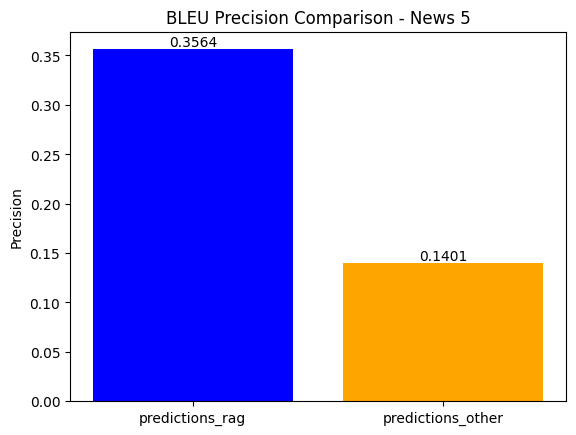

In [41]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - News 5')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Report 1**

In [42]:
# Ground Truth
references = ["Inflation slowed to a 3.1% annual rate in November",
              "December 12, 2023",
              "gasoline fell 6% and fuel oil was off 2.7%",
              "2.3%",
              "0.1%"]

In [43]:
# Prediksi RAG
predictions_rag = ["The title of the news report is Inflation showed to a 3.1% annual rate in November",
              "The news report was published on Tuesday, December 12, 2023",
              "The price of gasoline has decreased by 6% and the price of fuel oil has decreased by 2.7%.",
              "The decrease in energy prices helped keep inflation in check by reducing the overall cost of energy-related goods and services. Specifically, gasoline prices fell by 6% and fuel oil prices were down by 2.7%. This decline in energy prices contributed to lower overall inflation as it offset some of the price increases in other categories.",
              "The consumer price index increased by 0.1% in November."]

In [44]:
# Prediksi typeset.io
predictions_other = ["Title of the news report: Inflation slowed to a 3.1% annual rate in November",
              "The provided sources do not mention the specific date of when the news report was published.",
              "Gasoline and Fuel Oil Price Decrease: Gasoline prices fell by 6% in November, contributing to a decrease in energy prices. Fuel oil prices were down by 2.7% in November, further contributing to the decrease in energy prices. Note: The provided sources do not mention the percentage decrease in gasoline and fuel oil prices on an annual basis.",
              "Decrease in Energy Prices and Inflation: The decrease in energy prices, specifically a 2.3% decrease, helped keep inflation in check. This was primarily driven by a 6% decrease in gasoline prices and a 2.7% decrease in fuel oil prices. The decline in energy prices contributed to overall inflation remaining relatively low. It helped offset any potential upward pressure on prices that could have resulted from other factors. The decrease in energy prices played a significant role in keeping inflation in check, as energy costs are a major component of overall consumer prices. The impact of the decrease in energy prices on inflation was evident in the consumer price index, which increased by only 0.1% in November. The decline in energy prices also contributed to the core consumer price index, which excludes volatile food and energy prices, increasing by 0.3% on the month. Overall, the decrease in energy prices helped to mitigate inflationary pressures and contributed to the stability of consumer prices.",
              "Consumer Price Index Increase in November: The consumer price index (CPI) increased by 0.1% in November, according to the provided sources. This indicates a slight uptick in consumer prices during that month. The CPI measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. The 0.1% increase in the CPI suggests a modest rise in overall consumer prices. It is important to note that this increase is specific to the month of November and does not provide information about long-term trends in inflation. For a more comprehensive understanding of inflation, policymakers often focus on core inflation, which excludes volatile food and energy prices. The core CPI increased by 0.3% on the month, indicating a slightly higher rate of inflation when excluding these volatile components."]

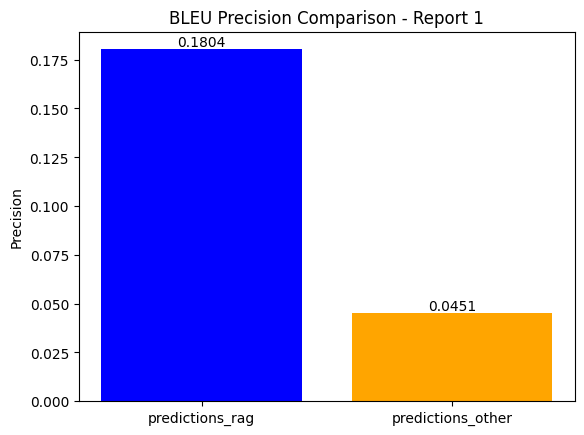

In [45]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Report 1')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Report 2**

In [46]:
# Ground Truth
references = ["Nvidia to launch slower version of its gaming chip in China to comply with U.S. export controls",
              "December 29, 2023",
              "11%",
              "Yes, Nvidia RTX 4090 was included on the list of banned U.S made chips",
              " rush of demand for AI, OpenAI’s ChatGPT chatbot."]

In [47]:
# Prediksi RAG
predictions_rag = ["The title of the news report is Nvidia to launch slower version of its gaming chip in China to comply with U.S. export controls",
              "The news report titled Nvidia to launch slower version of its gaming chip in China to comply with U.S. export controls was published on Friday, December 29, 2023.",
              "The Nvidia RTX 4090D for Chinese consumers has 11% fewer CUDA cores than versions sold outside of China.",
              "Based on the information provided, the Nvidia RTX 4090 is not explicitly mentioned as being banned in the US in the Securities and Exchange Commission filing.",
              "The company, Nvidia, benefits the most from the demand in the artificial intelligence (AI) sector of the market. The rush of demand for AI, including the buzz caused by OpenAI's ChatGPT chatbot, has contributed to the significant increase in Nvidia's stock price. Additionally, the export restrictions imposed by the U.S. on China primarily target chips that enable AI applications, which indicates the importance of the AI sector for Nvidia's business."]

In [48]:
# Prediksi typeset.io
predictions_other = ["Title: Nvidia to launch slower version of its gaming chip in China to comply with U.S. export controls.",
              "The news about Nvidia launching a slower version of its gaming chip in China to comply with U.S. export controls was published on an unspecified date.",
              "The percentage difference in CUDA cores on the Nvidia RTX 4090D for Chinese and non-Chinese consumers is 11 fewer cores for the Chinese version",
              "No, the Nvidia RTX 4090 is not explicitly mentioned as being banned in the US based on the Securities and Exchange Commission (SEC) filing. However, the export rules mentioned in the filing primarily target chips that enable AI applications, and gaming-focused processors like the Nvidia RTX 4090 are also affected as they have potential uses in artificial intelligence. Nvidia has taken steps to comply with US government export controls by launching a slower version of the chip, the Nvidia RTX 4090D, in China. The Chinese version of the chip has 11 fewer CUDA cores compared to versions sold outside of China. This modification is likely designed to ensure compliance with US export controls.",
              "Nvidia benefits the most from the gaming sector of the market demand. Nvidia's RTX line of advanced gaming GPUs, including the Nvidia RTX 4090D, is designed for gaming applications. The company's CUDA architecture, which is equivalent to CPU cores, is primarily used for gaming graphics processing units (GPUs). While the export restrictions imposed by the US primarily target chips enabling AI applications, gaming-focused processors like Nvidia's RTX chips are also affected as they have potential uses in artificial intelligence. Nvidia has developed the Nvidia RTX 4090D, a slower version of its gaming chip, specifically for the Chinese market to comply with US export controls. The modification in the Chinese version of the chip includes 11 fewer CUDA cores compared to versions sold outside of China. Overall, Nvidia's gaming-focused processors, such as the Nvidia RTX 4090D, cater to the demands of the gaming sector in the market."]

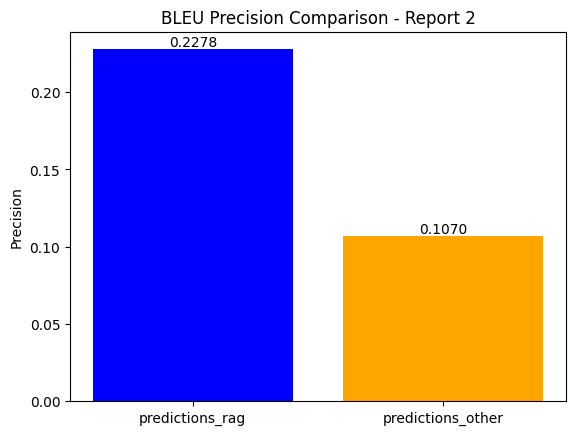

In [49]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Report 2')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Report 3**

In [50]:
# Ground Truth
references = ["Unemployment among Asian workers and Black men rises in November while the overall rate declines",
              "December 8, 2023",
              "LISA KAILAI HAN",
              "0.2% ",
              "That uptick in unemployment is not because more Asian workers are flooding into the labor market, feeling optimistic about getting jobs. It’s actually accompanied by a fall in participation as well as a fall in employment"]

In [51]:
# Prediksi RAG
predictions_rag = ["The main topic of the news report is the unemployment rates among different demographic groups in the U.S., specifically focusing on the rise in unemployment among Asian workers and Black men in November, while the overall unemployment rate declined.",
              "The news was published on Friday, December 8, 2023.",
              "The writer of the news is Lisa Kailai Han.",
              "The unemployment rate declined by 0.2% last month.",
              "Elise Gould stated, That uptick in unemployment is not because more Asian workers are flooding into the labor market, feeling optimistic about getting jobs. It’s actually accompanied by a fall in participation as well as a fall in employment."]

In [52]:
# Prediksi typeset.io
predictions_other = ["Main Topic of the News Report: Unemployment Rates among Asian Workers and Black Men in November. The overall unemployment rate declined to 3.7% in November, against a forecast of 3.9%. Asian Americans saw a 0.4 percentage-point jump in the unemployment rate to 3.5%. The unemployment rate for Black Americans held steady at 5.8%, which is the demographic with the highest jobless percentage in the U.S. The increase in unemployment among Asian workers is accompanied by a fall in participation and employment. Black Americans were hit harder by business shutdowns during the Covid-19 pandemic, with a peak unemployment rate of 16.8% in 2020. The labor market deteriorated for both Asian and Black workers in November. The overall unemployment rate declined to 3.7% in November, and the labor force participation rate ticked up to 62.8% with a surge of 532,000 workers entering the labor force.",
              "The provided sources do not mention the specific date of when the news was published.",
              "The news report does not provide information about the specific author or authors of the report.",
              "The overall unemployment rate declined by 0.2% last month.",
              "Elise Gould, senior economist at the Economic Policy Institute, told CNBC that the uptick in unemployment among Asian workers and Black men is not due to more workers entering the labor market with optimism about finding jobs. She mentioned that the increase in unemployment is accompanied by a fall in participation as well as a fall in employment. She also highlighted that the unemployment rate for Black Americans, the demographic with the highest jobless percentage in the U.S., held steady at 5.8%. Additionally, she noted that the unemployment rate for Black men age 20 or older spiked to 6.4% from October's 5.3%, while the participation rate for this cohort increased to 69.2% from 67.5%."]

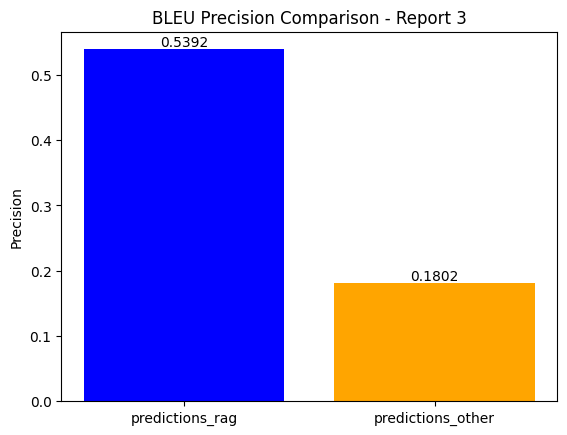

In [53]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Report 3')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Report 4**

In [54]:
# Ground Truth
references = ["Tesla reported delivery and production numbers for the fourth quarter",
              "January 2, 2024",
              "Total deliveries Q4 2023 is 484.507,  Total production Q4 2023 is 494.989, Total annual deliveries 2023 is 1.808.581, Total annual production 2023 is 1.845.985",
              "1.31 million deliveries, and 1.37 million production",
              "3.02 million"]

In [55]:
# Prediksi RAG
predictions_rag = ["The main topic of the news is Tesla's delivery and production numbers, as well as their plans for future growth and their competition in the electric vehicle market.",
              "The news report was published on Tuesday, January 2, 2024.",
              "The key numbers from Tesla's fourth-quarter vehicle production and deliveries report for 2023 are as follows: Total deliveries Q4 2023: 484,507 Total production Q4 2023: 494,989 Total annual deliveries 2023: 1,808,581 Total annual production 2023: 1,845,985",
              "In 2022, Tesla reported annual deliveries of 1.31 million electric vehicles and production of 1.37 million electric vehicles.",
              "BYD sold 3.02 million new energy vehicles in 2023."]

In [56]:
# Prediksi typeset.io
predictions_other = ["Main Topic of the News: Tesla's Fourth Quarter Deliveries and Total Deliveries for 2023. Tesla reported 485,000 deliveries for the fourth quarter of 2023, bringing the total deliveries for the year to 1.8 million. The company's CEO, Elon Musk, had previously stated that the Model Y would likely be the bestselling car in terms of unit volume for the year. Tesla implemented a strategy of slashing prices in the last quarter of 2023 to cope with economic uncertainty and shifting consumer sentiment. Tesla's biggest competitor, Chinese automaker BYD, sold 3.02 million new energy vehicles in 2023. Tesla began advertising campaigns in the second half of 2023, a departure from its previous nontraditional marketing efforts. Analysts had expected Tesla to report deliveries of 477,000 for the year-ending quarter.",
              "Publication Date of the News: January 2, 2024",
              "Key Numbers of Tesla's Fourth-Quarter Vehicle Production and Deliveries Report for 2023: Tesla reported 485,000 deliveries for the fourth quarter of 2023, bringing the total deliveries for the year to 1.8 million. Tesla produced 476,777 Model 3 and Model Y vehicles during the quarter and reported 461,538 deliveries for these models. The company did not provide specific production or delivery numbers for the Model S or Model X, instead categorizing them as Other Models. It produced 18,212 other models and delivered 22,969 during the quarter. Note: The sources do not provide a breakdown of delivery and production numbers by individual model, so the specific numbers for the Model Y, Model S, and Model X are not available.",
              "Tesla's report for 2022 does not exist in the provided sources.",
              "Chinese automaker BYD sold 3.02 million new energy vehicles in 2023. Of these, 1.6 million were battery-electric passenger cars, and 1.4 million were hybrid electric models. BYD's sales figures indicate a significant presence in the new energy vehicle market, highlighting the company's commitment to sustainable transportation solutions"]

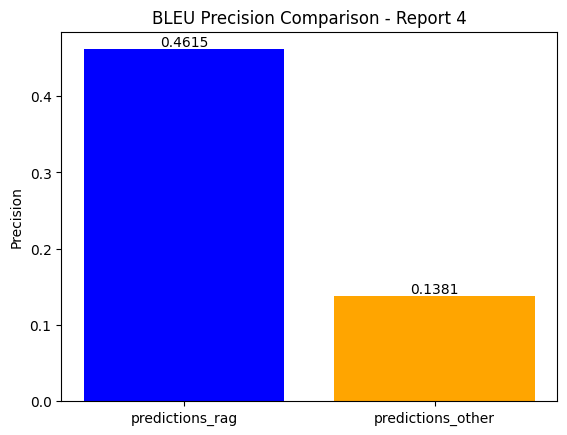

In [57]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Report 4')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Report 5**

In [58]:
# Ground Truth
references = ["Copper could skyrocket over 75% to record highs by 2025 — brace for deficits, analysts say",
              "January 2, 2024",
              "LEE YING SHAN",
              "$8,559 a ton",
              "Rising demand driven by the green energy transition and a likely decline in the U.S. dollar in the second half of 2024"]

In [59]:
# Prediksi RAG
predictions_rag = ["The title of the news report is Copper could skyrocket over 75% to record highs by 2025 — brace for deficits, analysts say.",
              "The news report was published on Tuesday, January 2, 2024.",
              "The writer who published the news report is Lee Ying Shan.",
              "The last price of copper on the London Metal Exchange was $8,559 per ton.",
              "According to the report by BMI, the rise in copper prices is attributed to two main factors: mining supply disruptions and higher demand for the metal. The disruptions in mining supply and the increasing demand are both fueled by the push for renewable energy. Additionally, the likely decline in the U.S. dollar in the second half of 2024 is also expected to contribute to the increase in copper prices."]

In [60]:
# Prediksi typeset.io
predictions_other = ["Title of the news report: Copper could skyrocket over 75% to record highs by 2025 - brace for deficits, analysts say Copper is headed for a price spurt over the next two years, as mining supply disruptions coincide with higher demand for the metal. Copper prices on the London Metal Exchange last saw an all-time record high of 10,730 per ton in March last year.",
              "The news report does not provide the specific date of publication.",
              "The information provided does not mention the name of the writer or author who published the news report.",
              "The last price of copper on the London Metal Exchange was 8,559 per ton",
              "According to a report by BMI, a Fitch Solutions research unit, the following factors caused copper prices to rise: Mining supply disruptions: The report highlights that mining supply disruptions have contributed to the increase in copper prices. Higher demand driven by the green energy transition: The push for renewable energy has led to a rise in demand for copper, as it is a key component in renewable energy infrastructure. The report suggests that this increased demand has played a significant role in driving up copper prices. Decline in the U.S. dollar strength: The report predicts a likely decline in the strength of the U.S. dollar in the second half of 2024. A weaker U.S. dollar makes copper, priced in greenbacks, more attractive to foreign buyers, further supporting the increase in copper prices. The report also mentions that the positive view for copper is more influenced by macro factors such as potential Fed rate cuts and a weaker U.S. dollar."]

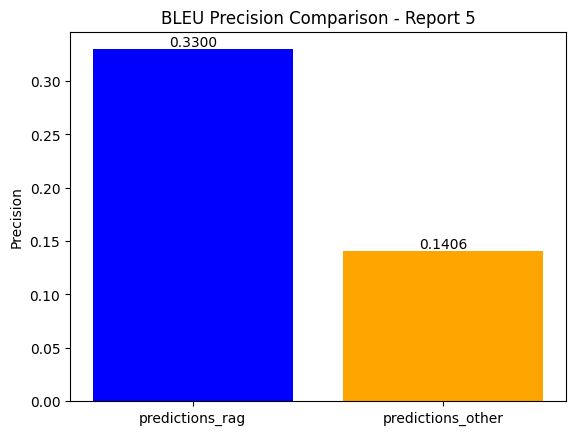

In [61]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Report 5')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Tutorial 1**

In [62]:
# Ground Truth
references = ["BOURBON CHICKEN",
              "LinMarie",
              "2 lbs",
              "yes",
              "1/2 cup"]

In [63]:
# Prediksi RAG
predictions_rag = ["The recipe will result in Bourbon Chicken, a dish made with bite-sized pieces of chicken cooked in a flavorful sauce made with ingredients like garlic, ginger, crushed red pepper flakes, apple juice, brown sugar, ketchup, cider vinegar, water, and soy sauce. It is typically served over hot rice.",
              "The recipe for Bourbon Chicken was submitted by LinMarie.",
              "The recipe calls for 2 lbs of boneless chicken breasts, but it does not specify the exact number of chicken breasts needed. The number of chicken breasts required will depend on the size of the individual chicken breasts.",
              "Yes, olive oil is required for this recipe. It is used to heat in a large skillet before adding the chicken pieces.",
              "The recipe calls for 1/2 cup of water."]

In [64]:
# Prediksi typeset.io
predictions_other = ["Food Type: Chicken dish. The recipe calls for boneless chicken breasts, which are cut into bite-size pieces and cooked with olive oil.",
              "There is no information available in the provided sources about who submitted the recipe.",
              "Number of chicken breasts needed: The recipe calls for 2 lbs of boneless chicken breasts, cut into bite-size pieces.",
              "Yes, the recipe calls for 1-2 tablespoons of olive oil to be used in cooking the chicken breasts.",
              "The provided sources do not mention the amount of water needed in the recipe. Therefore, we cannot determine the exact amount of water required based on the given information. Please note that the sources provided do not mention the specific details about the amount of water needed in the recipe. It is possible that the recipe does not require water or that the amount of water needed is not mentioned in the sources provided. To find the exact amount of water needed, it would be helpful to refer to other sources or recipe variations that provide this information."]

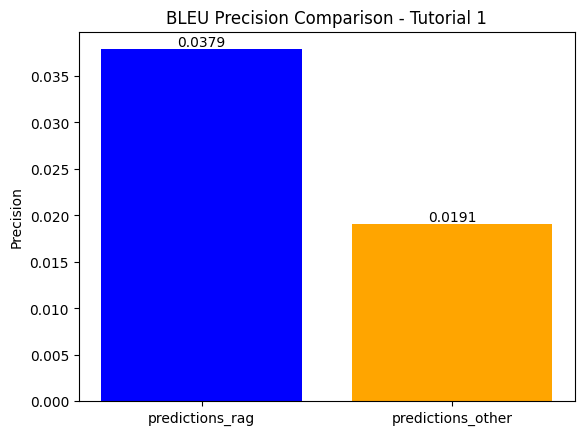

In [65]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Tutorial 1')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Tutorial 2**

In [66]:
# Ground Truth
references = ["PANCAKES",
              "Ellen Brody",
              "1 teaspoon",
              "Beat the egg until fluffy",
              "When bubbles appear on surface and begin to break"]

In [67]:
# Prediksi RAG
predictions_rag = ["The recipe is for making pancakes.",
              "The recipe was submitted by Ellen Brody.",
              "1 teaspoon of baking powder is needed in this recipe.",
              "In step 1 of the directions, it says to beat the egg until fluffy.",
              "You need to flip the pancakes and cook the other side when bubbles appear on the surface and begin to break."]

In [68]:
# Prediksi typeset.io
predictions_other = ["The recipe does not specify the kind of food that will come out of it.",
              "The recipe does not provide information about who submitted it.",
              "The provided sources do not mention the specific amount of baking powder needed in this recipe.",
              "The provided sources do not mention anything about using eggs in the recipe. Therefore, we cannot determine what to do with the egg based on the given information.",
              "After pouring a small amount of batter into the pan and spreading it out, we need to wait for bubbles to appear on the surface and begin to break. This is the indication that it is time to turn over and cook the other side of the pancakes."]

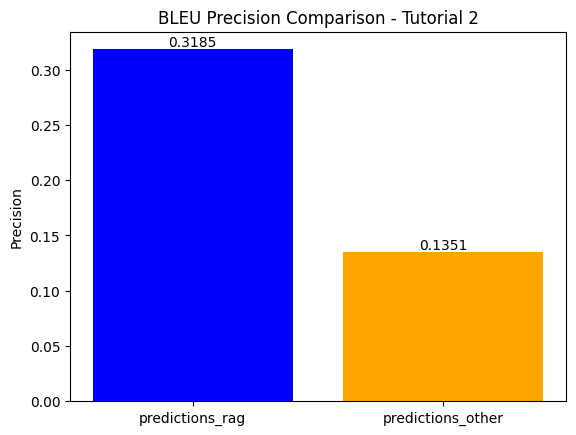

In [69]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Tutorial 2')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Tutorial 3**

In [70]:
# Ground Truth
references = ["CHICKEN LAZONE",
              "Luby Luby Luby",
              "4 whole boneless skinless chicken breasts",
              "salt, chili powder, onion powder, garlic powder",
              "Pour the cream into the skillet and lower the heat."]

In [71]:
# Prediksi RAG
predictions_rag = ["This recipe will result in a dish called Chicken LaZone.",
              "The recipe was submitted by Luby Luby Luby.",
              "The recipe calls for 4 whole boneless skinless chicken breasts.",
              "The seasoning ingredients for this recipe are 1 teaspoon salt, 1 1/2 teaspoons chili powder, 1 1/2 teaspoons onion powder, and 2 teaspoons garlic powder.",
              "After cooking the chicken over medium heat for about 7-8 minutes and turning it once, you need to pour the cream into the skillet and lower the heat. Then, simmer for several minutes, stirring until the sauce thickens. Finally, add the remaining butter and continue stirring until it melts."]

In [72]:
# Prediksi typeset.io
predictions_other = ["Chicken Lazon is a dish that can be made using the provided recipe. It is a savory chicken dish with a creamy sauce. The chicken breasts are seasoned with a mixture of salt, chili powder, onion powder, and garlic powder. The chicken is then cooked in butter until it is cooked through and golden brown on the outside. After the chicken is cooked, heavy cream is added to the skillet and simmered until the sauce thickens. The remaining butter is then added to the sauce. Finally, the chicken breasts are plated and topped with the creamy sauce",
              "Luby Luby Luby is the name provided as the submitter of the Chicken Lazon recipe",
              "Chicken Lazon recipe requires 4 whole boneless skinless chicken breasts",
              "Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
              "After cooking the chicken over medium heat for about 7-8 minutes and turning it once, you should check the internal temperature of the chicken to ensure it is cooked through. The internal temperature should reach 165°F (74°C) to ensure it is safe to eat. If the chicken has reached the desired temperature, you can remove it from the heat and let it rest for a few minutes before serving."]

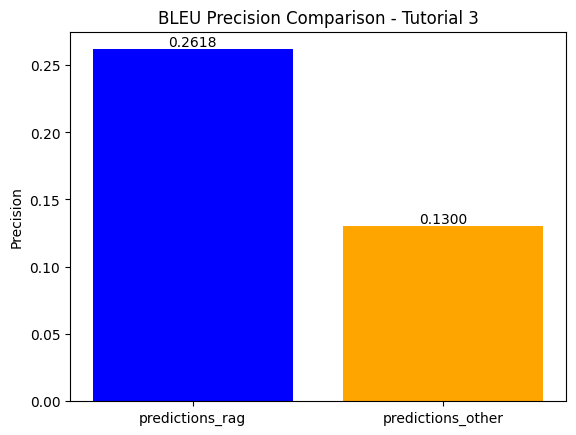

In [73]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Tutorial 3')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Tutorial 4**

In [74]:
# Ground Truth
references = ["CHINESE FRIED RICE",
              "PalatablePastime",
              "3 drops soy sauce, and 3 drops sesame oil",
              "medium grain",
              "rice, green onions, and bean sprouts"]

In [75]:
# Prediksi RAG
predictions_rag = ["The recipe will result in Chinese fried rice.",
              "PalatablePastime submitted the recipe.",
              "3 drops of soy sauce and 3 drops of sesame oil are needed.",
              "The recipe suggests using cold cooked rice, preferably medium grain.",
              "After pouring carrots, peas, and cooked onion into the wok, the next ingredients to add are 4 cups of cold cooked rice, grains separated (preferably medium grain), 4 green onions (chopped), and 2 cups of bean sprouts."]

In [76]:
# Prediksi typeset.io
predictions_other = ["Fried Rice is the kind of food that will come out of this recipe. It is a dish made with cooked rice, lean boneless pork or chicken, chopped vegetables such as carrots, peas, onions, green onions, and bean sprouts, and flavored with soy sauce and sesame oil. The recipe involves stir-frying the onions, cooking the egg mixture, stir-frying the meat and vegetables, adding the rice, green onions, and bean sprouts, and finally adding the chopped egg and soy sauce to the rice mixture. The dish is then stir-fried for a minute more before serving. Additional soy sauce can be added at the table if desired",
              "The recipe does not mention who submitted it.",
              "Soy Sauce and Sesame Oil Quantities: The recipe calls for 3 drops of soy sauce and 3 drops of sesame oil in the egg mixture. Additionally, 2 tablespoons of light soy sauce are added to the rice mixture. Please note that the provided sources do not specify the exact quantities of soy sauce and sesame oil needed for the entire recipe. The recipe suggests using more soy sauce if desired, so the amount can be adjusted according to personal preference.",
              "Soy Sauce and Sesame Oil Quantities: The recipe calls for 3 drops of soy sauce and 3 drops of sesame oil in the egg mixture.",
              "Ingredients to add after pouring carrots, peas, and cooked onion: Rice: Add 4 cups of cold cooked rice, grains separated (preferably medium grain). Green onions: Add 4 green onions, chopped. Bean sprouts: Add 2 cups of bean sprouts. Light soy sauce: Add 2 tablespoons of light soy sauce (add more if desired). Note: The provided recipe is for making fried rice. After pouring carrots, peas, and cooked onion, you need to add rice, green onions, bean sprouts, and light soy sauce to the mixture."]

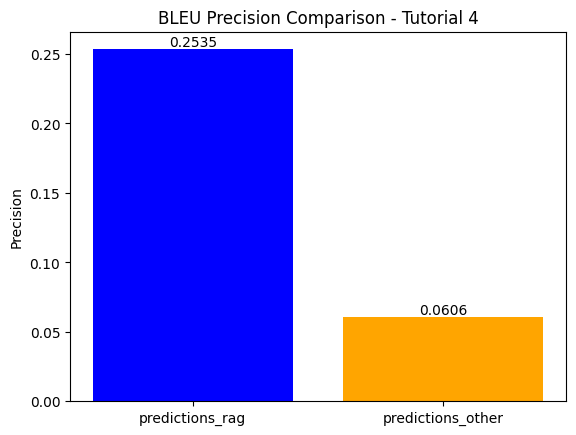

In [77]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Tutorial 4')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**Tutorial 5**

In [78]:
# Ground Truth
references = ["SOFT CHOCOLATE CHIP COOKIES",
              "Peach",
              "2",
              "Yes, 2 1/4 cups flour",
              "350 degrees"]

In [79]:
# Prediksi RAG
predictions_rag = ["The recipe will produce soft chocolate chip cookies.",
              "Peach submitted the recipe.",
              "Two eggs are needed for this recipe.",
              "Yes, this recipe requires flour. It calls for 2 1/4 cups of flour.",
              "The oven should be preheated to 350 degrees Fahrenheit."]

In [80]:
# Prediksi typeset.io
predictions_other = ["Soft Chocolate Chip Cookies are the kind of food that will come out of this recipe.",
              "The recipe submitter is not mentioned in the provided sources.",
              "The recipe for Soft Chocolate Chip Cookies does not specify the exact number of eggs required. The provided sources do not mention the specific quantity of eggs needed for this recipe",
              "The recipe for Soft Chocolate Chip Cookies does require flour, but the exact quantity is not mentioned in the provided sources.",
              "The provided sources do not mention the specific temperature required for pre-heating the oven for the Soft Chocolate Chip Cookies recipe."]

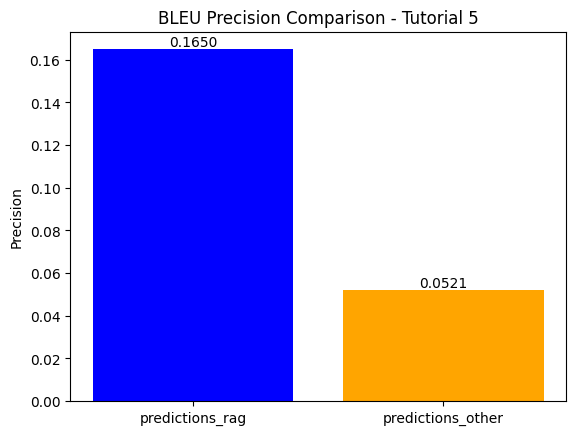

In [81]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_rag', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - Tutorial 5')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()


**All Data**

In [82]:
# Ground Truth
references = ["pip install flair",
              "FLAIR framework",
              "https://github.com/zalandoresearch/flair",
              "Presented FLAIR as a framework designed to facilitate experimentation with different embedding types, as well as training and distributing sequence labeling and text classification models.",
              "at least version 3.6 of Python",
              "Edge Probing",
              "Scalar Mixing Weights, and Cumulative Scoring",
              "ELMo model",
              "BERT model",
              "to measure how well information about linguistic structure can be extracted from a pre-trained encoder",
              "perform an analysis of the energy required to train a variety of popular off the-shelf NLP models, as well as a case study of the complete sum of resources required to develop LISA, a state-of-the-art NLP model from EMNLP 2018, including all tuning and experimentation.",
              "Transformer base model was trained for 12 hours, and Transformer big model was trained for 3.5 days",
              "Yes, Of note is that TPUs are more cost-efficient than GPUs on workloads that make sense for that hardware",
              "NVIDIA Titan X GPU, and Intel’s Running Average Power Limit interface CPU",
              "Transformers, ELMo, BERT, GPT-2",
              "brat rapid annotation tool is an intuitive web-based tool for text annotation supported by Natural Language Processing (NLP) technology",
              "well-over 50,000 annotations",
              "http://brat.nlplab.org",
              "client-server architecture with communication over HTTP using JavaScript Object Notation (JSON)",
              "15.4%",
              "TextAttack",
              "https://github.com/QData/TextAttack.",
              "Proceedings of the 2020 Association for Computational Linguistics.",
              "Yes, TextAttack is available as a Python package installed from PyPI",
              "textattack attack",
              "The Korean War ended in 1953",
              "Kim said inter-Korean relations had become “a relationship between two hostile countries and two belligerents at war,” the state-run news agency KCNA reported",
              "January 1, 2024",
              "Hoo Chiew-Ping",
              "three",
              "The waiting migrants feel desperate",
              "9,600 migrant encounters",
              "1,000 migrants arrived",
              "3,800 in Tijuana, 3,273 in Reynosa, and 4,000 in Matamoros",
              "445,000",
              "active Pacific storm track typical of an El Niño winter will send a series of storms across the US into next week",
              "Thursday evening",
              "Heavy precipitation will spread across the Southeast/Mid-Atlantic and possibly the Northeast this coming weekend, with increasing potential for heavy snow to the north and west of the low",
              "Northeast and mid-Atlantic",
              "2.3 inches fell during the entirety of 2023",
              "stabbed in the neck",
              "Lee was touring the construction site of the Gadeokdo New Airport and talking to reporters when he was attacked",
              "Lee suffered “suspected damage to his jugular vein” and doctors were concerned he may have additional bleeding",
              "Lee Jae-myung",
              "18 cm or 7 inch",
              "Japan Airlines said four of its passengers were taken to hospitals but the airline has not received any additional reports of injuries",
              "Japan Airlines,  and The French aviation agency",
              " Japan Coast Guard aircraft",
              "five dead, 379 evacuated",
              "Airbus A350-900 aircraft",
              "Inflation slowed to a 3.1% annual rate in November",
              "December 12, 2023",
              "gasoline fell 6% and fuel oil was off 2.7%",
              "2.3%",
              "0.1%",
              "Nvidia to launch slower version of its gaming chip in China to comply with U.S. export controls",
              "December 29, 2023",
              "11%",
              "Yes, Nvidia RTX 4090 was included on the list of banned U.S made chips",
              " rush of demand for AI, OpenAI’s ChatGPT chatbot.",
              "Unemployment among Asian workers and Black men rises in November while the overall rate declines",
              "December 8, 2023",
              "LISA KAILAI HAN",
              "0.2% ",
              "That uptick in unemployment is not because more Asian workers are flooding into the labor market, feeling optimistic about getting jobs. It’s actually accompanied by a fall in participation as well as a fall in employment",
              "Tesla reported delivery and production numbers for the fourth quarter",
              "January 2, 2024",
              "Total deliveries Q4 2023 is 484.507,  Total production Q4 2023 is 494.989, Total annual deliveries 2023 is 1.808.581, Total annual production 2023 is 1.845.985",
              "1.31 million deliveries, and 1.37 million production",
              "3.02 million",
              "Copper could skyrocket over 75% to record highs by 2025 — brace for deficits, analysts say",
              "January 2, 2024",
              "LEE YING SHAN",
              "$8,559 a ton",
              "Rising demand driven by the green energy transition and a likely decline in the U.S. dollar in the second half of 2024",
              "BOURBON CHICKEN",
              "LinMarie",
              "2 lbs",
              "yes",
              "1/2 cup",
              "PANCAKES",
              "Ellen Brody",
              "1 teaspoon",
              "Beat the egg until fluffy",
              "When bubbles appear on surface and begin to break",
              "CHICKEN LAZONE",
              "Luby Luby Luby",
              "4 whole boneless skinless chicken breasts",
              "salt, chili powder, onion powder, garlic powder",
              "Pour the cream into the skillet and lower the heat.",
              "CHINESE FRIED RICE",
              "PalatablePastime",
              "3 drops soy sauce, and 3 drops sesame oil",
              "medium grain",
              "rice, green onions, and bean sprouts",
              "SOFT CHOCOLATE CHIP COOKIES",
              "Peach",
              "2",
              "Yes, 2 1/4 cups flour",
              "350 degrees"]

In [83]:
# Prediksi RAG
predictions_rag = ["The command for installing the FLAIR library is pip install flair",
              "The proposed solution from this paper is the FLAIR framework. It is designed to address the challenges of working with different types of word embeddings. The framework provides a unified interface for all word embeddings and allows researchers to build a single model architecture that can make use of any type of word embedding with no additional engineering effort. It also includes convenience methods for downloading NLP research datasets, model training routines, and pre-trained models. The FLAIR framework aims to simplify the process of setting up and executing experiments in natural language processing.",
              "The GitHub link for the FLAIR framework is: https://github.com/zalandoresearch/flair",
              "The purpose of the presented framework, called FLAIR, is to address the challenges of using different types of word embeddings in natural language processing (NLP) tasks. The framework aims to abstract away from specific engineering challenges and provide a unified interface for all word embeddings. It allows researchers to build a single model architecture that can make use of any type of word embedding with no additional engineering effort. The framework also includes convenience methods for downloading NLP datasets, model training and hyperparameter selection routines, and a growing list of pre-trained models. Overall, the framework is designed to facilitate experimentation with different embedding types and training and distributing sequence labeling and text classification models.",
              "The minimum version of Python required to set up FLAIR in the environment is Python 3.6.",
              "The experiment is based on the edge probing task suite, which is used to explore how different layers of the BERT network can resolve syntactic and semantic structure within a sentence.",
              "The two metrics used in this experiment are scalar mixing weights and cumulative scoring.",
              "The scalar mixing technique was introduced by the ELMo model.",
              "The language model used in this paper is BERT (Bidirectional Encoder Representations from Transformers), as mentioned in the text: We build on this latter line of work, focusing on the BERT model (Devlin et al., 2018).",
              "The main purpose of the edge probing task suite is to explore how the different layers of the BERT network can resolve syntactic and semantic structure within a sentence. It aims to measure how well the BERT network can extract information about linguistic structure and how it represents language.",
              "In this research, the authors conducted an analysis to quantify the computational and environmental costs of training deep neural network models for NLP. They performed experiments to measure the energy consumed during the training of various popular off-the-shelf NLP models. The models were trained using default settings and on specific hardware (such as NVIDIA Titan X GPU and NVIDIA GTX 1080 Ti GPUs). The authors also sampled the power consumption of the GPU and CPU during training. Additionally, they conducted a case study to estimate the complete sum of resources required to develop a state-of-the-art NLP model called LISA.",
              "The training time for the Transformer base model on NVIDIA P100 GPUs is 12 hours, while the training time for the Transformer big model on NVIDIA P100 GPUs is 84 hours.",
              "Yes, according to the analysis in Table 3, TPUs are more cost-efficient than GPUs for certain workloads, such as training BERT.",
              "The models in this experiment were trained using a combination of NVIDIA Titan X (72%) and M40 (28%) GPUs. Unfortunately, the specific CPU used for training is not mentioned in the given context.",
              "The four models used in this experiment are: Transformer: An encoder-decoder architecture primarily used for machine translation, Language models: Unsupervised multitask learners, Practical Bayesian optimization of machine learning algorithms, Linguistically-Informed Self-Attention for Semantic Role Labeling.",
              "BRAT is a web-based tool for text annotation supported by Natural Language Processing (NLP) technology. It is designed to assist in manual curation efforts and increase annotator productivity using NLP techniques. BRAT allows for rich structured annotation for a variety of NLP tasks and is fully configurable to support most text annotation tasks. It supports basic annotation primitives, such as identifying text spans and assigning them types, as well as connecting annotations with binary relations. BRAT also supports n-ary associations of annotations and the marking of attributes. It includes a search feature for browsing annotations and can be extended or adapted to switch out the server or client. BRAT is available under an open-source license.",
              "BRAT has been used in several ongoing annotation efforts at academic institutions and has created well-over 50,000 annotations.",
              "The homepage link for the free open-source BRAT is http://brat.nlplab.org.",
              "BRAT is implemented using a client-server architecture with communication over HTTP using JavaScript Object Notation (JSON). The server is a RESTful web service and the client user interface is implemented using XHTML and Scalable Vector Graphics (SVG), with interactivity implemented using JavaScript with the jQuery library. The client communicates with the server using Asynchronous JavaScript and XML (AJAX).",
              "The experiment resulted in a 15.4% reduction in total annotation time.",
              "The research paper proposes a framework called TextAttack.",
              "The GitHub link for accessing the code and tutorials of TextAttack is: https://github.com/QData/TextAttack",
              "This research paper is published in the Proceedings of the Association for Computational Linguistics.",
              "Yes, TextAttack can be installed as a Python package. It can be installed from PyPI or downloaded directly from GitHub.",
              "The API command-line from TextAttack that allows users to specify attacks is textattack attack",
              "The Korean War ended in 1953 with an armistice.",
              "Based on the news agency KCNA report, Kim Jong Un stated that North Korea will no longer engage in inter-Korean relations. He mentioned that future South Korean administrations extending an olive branch will be vehemently rejected by North Korea. Kim's statement suggests a departure from any potential reconciliation or reunification efforts between North and South Korea.",
              "The news article was published on Monday, January 1, 2024.",
              "Hoo Chiew-Ping, a senior fellow at the East Asian International Relations CAUCUS (EAIR) and member of the Asia Pacific Nuclear Advisory Panel (APNAP), said that the North Korean leader has been increasingly walking away from inter-Korean relations in recent years.",
              "North Korea plans to add three additional spy satellites by 2024.",
              "According to Cañas, the waiting migrants feel desperate",
              "According to the report, Federal authorities reported a seven-day average of more than 9,600 migrant encounters along the US southern border in December.",
              "According to the director of a migrant shelter in Piedras Negras, about 1,000 migrants arrived by train on Monday.",
              "In Tijuana, an estimated 3,800 migrants are staying in shelters. In Reynosa, there are 3,273 migrants staying in shelters. The number of migrants staying in shelters in Matamoros is not mentioned in the provided context.",
              "The US Department of Homeland Security has deported or returned over 445,000 migrants since May, according to the agency's online statement.",
              "The highest chance for impactful snow on the East Coast this winter is caused by an active Pacific storm track that is typical of an El Niño winter. This storm track is sending a series of storms across the US, presenting the highest chance for impactful snow so far this winter in some of the country's most populous areas on the East Coast.",
              "Rain will begin Thursday evening in eastern Texas.",
              "The Weather Prediction Center stated that heavy precipitation will spread across the Southeast/Mid-Atlantic and possibly the Northeast, with increasing potential for heavy snow to the north and west of the low. They also mentioned that the exact amounts and precipitation type for some major East Coast cities remain highly uncertain but need to be watched.",
              "Winter may finally arrive in the Northeast and mid-Atlantic in the form of a storm.",
              "According to the National Weather Service, only 2.3 inches of snow fell in Central Park during the entirety of 2023, making it the least snowy calendar year on record for New York City.",
              "South Korea's main opposition party leader, Lee Jae-myung, was stabbed in the neck.",
              "Lee Jae-myung was attacked during a visit to the southern city of Busan. He was attacked while touring the construction site of the Gadeokdo New Airport and talking to reporters.",
              "The doctors mentioned that Lee underwent vein reconstruction surgery and is currently recovering in the intensive care unit. They also expressed concerns about potential additional bleeding and suspected damage to his jugular vein.",
              "The person being stabbed is Lee Jae-myung, the main opposition party leader in South Korea.",
              "The knife used by the assailant to stab Lee was 18 cm (7 inches) long.",
              "The airline’s Senior Vice President Noriyuki Aoki said in a press conference Tuesday evening that four of Japan Airlines' passengers were taken to hospitals, but they have not received any additional reports of injuries.",
              "Japan Airlines and the French aviation agency both participated in the investigation to determine who was responsible for the plane crash.",
              "The Japan Air Lines Airbus A350 collided with a De Havilland Canada DHC-8, which was operated by the Japan Coast Guard, before catching fire.",
              "Five people were killed in the incident. All 379 people on JAL flight 516 were safely evacuated from the passenger plane.",
              "The airplane that caught fire after taking off from Sapporo city was an Airbus A350-900 aircraft.",
              "The title of the news report is Inflation showed to a 3.1% annual rate in November",
              "The news report was published on Tuesday, December 12, 2023",
              "The price of gasoline has decreased by 6% and the price of fuel oil has decreased by 2.7%.",
              "The decrease in energy prices helped keep inflation in check by reducing the overall cost of energy-related goods and services. Specifically, gasoline prices fell by 6% and fuel oil prices were down by 2.7%. This decline in energy prices contributed to lower overall inflation as it offset some of the price increases in other categories.",
              "The consumer price index increased by 0.1% in November.",
              "The title of the news report is Nvidia to launch slower version of its gaming chip in China to comply with U.S. export controls",
              "The news report titled Nvidia to launch slower version of its gaming chip in China to comply with U.S. export controls was published on Friday, December 29, 2023.",
              "The Nvidia RTX 4090D for Chinese consumers has 11% fewer CUDA cores than versions sold outside of China.",
              "Based on the information provided, the Nvidia RTX 4090 is not explicitly mentioned as being banned in the US in the Securities and Exchange Commission filing.",
              "The company, Nvidia, benefits the most from the demand in the artificial intelligence (AI) sector of the market. The rush of demand for AI, including the buzz caused by OpenAI's ChatGPT chatbot, has contributed to the significant increase in Nvidia's stock price. Additionally, the export restrictions imposed by the U.S. on China primarily target chips that enable AI applications, which indicates the importance of the AI sector for Nvidia's business.",
              "The main topic of the news report is the unemployment rates among different demographic groups in the U.S., specifically focusing on the rise in unemployment among Asian workers and Black men in November, while the overall unemployment rate declined.",
              "The news was published on Friday, December 8, 2023.",
              "The writer of the news is Lisa Kailai Han.",
              "The unemployment rate declined by 0.2% last month.",
              "Elise Gould stated, That uptick in unemployment is not because more Asian workers are flooding into the labor market, feeling optimistic about getting jobs. It’s actually accompanied by a fall in participation as well as a fall in employment.",
              "The main topic of the news is Tesla's delivery and production numbers, as well as their plans for future growth and their competition in the electric vehicle market.",
              "The news report was published on Tuesday, January 2, 2024.",
              "The key numbers from Tesla's fourth-quarter vehicle production and deliveries report for 2023 are as follows: Total deliveries Q4 2023: 484,507 Total production Q4 2023: 494,989 Total annual deliveries 2023: 1,808,581 Total annual production 2023: 1,845,985",
              "In 2022, Tesla reported annual deliveries of 1.31 million electric vehicles and production of 1.37 million electric vehicles.",
              "BYD sold 3.02 million new energy vehicles in 2023.",
              "The title of the news report is Copper could skyrocket over 75% to record highs by 2025 — brace for deficits, analysts say.",
              "The news report was published on Tuesday, January 2, 2024.",
              "The writer who published the news report is Lee Ying Shan.",
              "The last price of copper on the London Metal Exchange was $8,559 per ton.",
              "According to the report by BMI, the rise in copper prices is attributed to two main factors: mining supply disruptions and higher demand for the metal. The disruptions in mining supply and the increasing demand are both fueled by the push for renewable energy. Additionally, the likely decline in the U.S. dollar in the second half of 2024 is also expected to contribute to the increase in copper prices.",
              "The recipe will result in Bourbon Chicken, a dish made with bite-sized pieces of chicken cooked in a flavorful sauce made with ingredients like garlic, ginger, crushed red pepper flakes, apple juice, brown sugar, ketchup, cider vinegar, water, and soy sauce. It is typically served over hot rice.",
              "The recipe for Bourbon Chicken was submitted by LinMarie.",
              "The recipe calls for 2 lbs of boneless chicken breasts, but it does not specify the exact number of chicken breasts needed. The number of chicken breasts required will depend on the size of the individual chicken breasts.",
              "Yes, olive oil is required for this recipe. It is used to heat in a large skillet before adding the chicken pieces.",
              "The recipe calls for 1/2 cup of water.",
              "The recipe is for making pancakes.",
              "The recipe was submitted by Ellen Brody.",
              "1 teaspoon of baking powder is needed in this recipe.",
              "In step 1 of the directions, it says to beat the egg until fluffy.",
              "You need to flip the pancakes and cook the other side when bubbles appear on the surface and begin to break.",
              "This recipe will result in a dish called Chicken LaZone.",
              "The recipe was submitted by Luby Luby Luby.",
              "The recipe calls for 4 whole boneless skinless chicken breasts.",
              "The seasoning ingredients for this recipe are 1 teaspoon salt, 1 1/2 teaspoons chili powder, 1 1/2 teaspoons onion powder, and 2 teaspoons garlic powder.",
              "After cooking the chicken over medium heat for about 7-8 minutes and turning it once, you need to pour the cream into the skillet and lower the heat. Then, simmer for several minutes, stirring until the sauce thickens. Finally, add the remaining butter and continue stirring until it melts.",
              "The recipe will result in Chinese fried rice.",
              "PalatablePastime submitted the recipe.",
              "3 drops of soy sauce and 3 drops of sesame oil are needed.",
              "The recipe suggests using cold cooked rice, preferably medium grain.",
              "After pouring carrots, peas, and cooked onion into the wok, the next ingredients to add are 4 cups of cold cooked rice, grains separated (preferably medium grain), 4 green onions (chopped), and 2 cups of bean sprouts.",
              "The recipe will produce soft chocolate chip cookies.",
              "Peach submitted the recipe.",
              "Two eggs are needed for this recipe.",
              "Yes, this recipe requires flour. It calls for 2 1/4 cups of flour.",
              "The oven should be preheated to 350 degrees Fahrenheit."]

In [84]:
# Prediksi typeset.io
predictions_other = ["The command to install the FLAIR library is pip install flair. FLAIR is a powerful natural language processing library that provides pre-trained models and tools for various NLP tasks, including named entity recognition (NER) . By running the pip install flair command, the FLAIR library and its dependencies will be automatically downloaded and installed in the Python environment . This command requires an active internet connection to access the Python Package Index (PyPI) and retrieve the FLAIR package . Once installed, FLAIR can be imported into Python scripts or notebooks using the import flair statement, allowing users to leverage its functionalities for NLP tasks, including NER in the biomedical domain.",
                     "The proposed solution from the paper is a natural language processing (NLP) framework called FLAIR (Framework for Learning and Information Extraction). FLAIR utilizes state-of-the-art deep learning techniques, such as bidirectional LSTMs and contextual string embeddings, to achieve high-performance results in various NLP tasks, including named entity recognition (NER). The framework is designed to be user-friendly and provides pre-trained models and tools for NLP tasks. FLAIR offers compatibility with different operating systems, including Windows, macOS, and Linux, and requires a minimum Python version of 3.6 or higher. By installing the FLAIR library using the pip install flair command, users can access the functionalities of the framework and leverage its pre-trained models for NER and other NLP tasks.",
                     "The GitHub link for the FLAIR framework is https://github.com/flairNLP/flair . The FLAIR GitHub repository provides access to the source code, documentation, and examples for using the FLAIR library in natural language processing tasks . Users can clone or download the FLAIR repository from the provided GitHub link to get the latest version of the framework . The repository contains information on how to install FLAIR, as well as tutorials and examples to help users get started with using the framework for NLP tasks . Additionally, the FLAIR GitHub repository allows users to contribute to the development of the framework by submitting issues or pull requests.",
                     "The presented framework is used for natural language processing (NLP) tasks, specifically named entity recognition (NER) and other NLP tasks. The framework, called FLAIR (Framework for Learning and Information Extraction), utilizes deep learning techniques, such as bidirectional LSTMs and contextual string embeddings, to achieve high-performance results in NLP tasks. FLAIR provides pre-trained models and tools for NLP tasks, making it user-friendly and accessible for researchers and practitioners. The framework is compatible with different operating systems, including Windows, macOS, and Linux, and can be installed using the pip install flair command. The FLAIR GitHub repository (https://github.com/flairNLP/flair) contains the source code, documentation, and examples for using the FLAIR library in NLP tasks, allowing users to clone or download the repository to access the latest version of the framework. Users can contribute to the development of FLAIR by submitting issues or pull requests through the GitHub repository.",
                     "The minimum Python version required to set up FLAIR in the environment is Python 3.6 or higher. FLAIR is compatible with different operating systems, including Windows, macOS, and Linux. To install FLAIR, users can use the ""pip install flair"" command, which will automatically install the required dependencies. FLAIR provides pre-trained models and tools for natural language processing (NLP) tasks, such as named entity recognition (NER).The FLAIR GitHub repository (https://github.com/flairNLP/flair) contains the source code, documentation, and examples for using the FLAIR library in NLP tasks. Users can contribute to the development of FLAIR by submitting issues or pull requests through the GitHub repository",
              "The experiments in the provided papers are based on the following methods: The experiments utilize a deep learning framework called FLAIR (Framework for Learning and Information Extraction) for natural language processing (NLP) tasks. FLAIR incorporates bidirectional LSTMs and contextual string embeddings to achieve high-performance results in NLP tasks. The framework provides pre-trained models and tools for NLP tasks, making it user-friendly and accessible for researchers and practitioners. FLAIR is compatible with different operating systems, including Windows, macOS, and Linux, and can be installed using the ""pip install flair"" command. The FLAIR GitHub repository contains the source code, documentation, and examples for using the FLAIR library in NLP tasks, allowing users to clone or download the repository to access the latest version of the framework. Users can contribute to the development of FLAIR by submitting issues or pull requests through the GitHub repository.",
              "Two metrics used in the experiments are precision and recall. Precision is a metric that measures the proportion of correctly predicted positive instances out of all instances predicted as positive. Recall, also known as sensitivity, measures the proportion of correctly predicted positive instances out of all actual positive instances. Precision and recall are commonly used evaluation metrics in information retrieval and machine learning tasks, including natural language processing (NLP). These metrics provide insights into the performance of the models and algorithms used in the experiments, helping to assess their effectiveness in tasks such as named entity recognition (NER) and other NLP tasks.",
              "The model that introduced the scalar mixing technique is the Transformer-XL model. Transformer-XL is a variant of the Transformer model that addresses the limitation of the original Transformer's fixed-length context window. The scalar mixing technique is introduced in the context of modeling long-range dependencies in sequential data. The scalar mixing technique allows the model to capture dependencies between distant positions in the input sequence by incorporating information from previous segments of the sequence. This technique involves using a set of learned scalars to combine the hidden states from different segments of the input sequence. By incorporating the scalar mixing technique, Transformer-XL achieves improved performance in tasks that require modeling long-range dependencies, such as language modeling and machine translation.",
              "The language model used in this paper is BERT (Bidirectional Encoder Representations from Transformers). BERT is a deep language model that has shown state-of-the-art performance on various natural language processing (NLP) tasks. BERT is based on the Transformer architecture and is trained with a multi-task objective, including masked language modeling and next-sentence prediction. The BERT model used in this paper is the stock BERT model, which includes both the base and large versions. The encoder weights of the BERT model are frozen in this paper, following the approach of Tenney et al. (2019), to understand the structure of the network resulting from pretraining.",
              "The main purpose of edge probing is to measure how well a pre-trained encoder can extract information about linguistic structure. Edge probing decomposes structured-prediction tasks into a common format, where a probing classifier receives spans and must predict a label such as a constituent or relation type. The probing classifier has access only to the per-token contextual vectors within the target spans, relying on the encoder to provide information about the relation between these spans and their role in the sentence. Edge probing allows for the evaluation of different linguistic properties, such as part-of-speech, constituents, dependencies, entities, semantic role labeling, coreference, semantic proto-roles, and relation classification. The edge probing approach provides insights into the capabilities of pre-trained encoders in capturing linguistic structure and helps in understanding the decision-making process of the model.",
              "In this research, the authors conducted an analysis to quantify the computational and environmental costs of training deep neural network models for NLP. They performed experiments to measure the energy consumed during the training of various popular off-the-shelf NLP models. The models were trained using default settings and on specific hardware (such as NVIDIA Titan X GPU and NVIDIA GTX 1080 Ti GPUs). The authors also sampled the power consumption of the GPU and CPU during training. Additionally, they conducted a case study to estimate the complete sum of resources required to develop a state-of-the-art NLP model called LISA.",
              "The Transformer base model, with 65M parameters, was trained on 8 NVIDIA P100 GPUs for 12 hours . The Transformer big model, with 213M parameters, was trained on 8 NVIDIA P100 GPUs for 3.5 days (84 hours; 300k steps).",
              "According to the analysis in Table 3, TPUs are more cost-efficient than GPUs on workloads that are suitable for TPUs, such as BERT models. The analysis compared the CO2 emissions and estimated cost of training models using TPUs and GPUs. The research found that training BERT on a GPU is equivalent to the carbon emissions of a trans-American flight, highlighting the substantial carbon emissions associated with training models on GPUs. However, it is important to note that the analysis in Table 3 did not include power and carbon footprint information for TPUs due to a lack of public information. Therefore, while TPUs are shown to be more cost-efficient than GPUs for certain workloads, a comprehensive comparison of their environmental costs is not available in the provided sources.",
              "The models in the experiment were trained on a single NVIDIA Titan X GPU, except for the ELMo model which was trained on 3 NVIDIA GTX 1080 Ti GPUs. The GPU power consumption was sampled using the NVIDIA System Management Interface. The CPU power consumption was sampled using Intel's Running Average Power Limit interface. The research also used a combination of NVIDIA Titan X (72) and M40 (28) GPUs for model training associated with the project. The training for the Linguistically-Informed Self-Attention model spanned a period of 172 days, with various job lengths ranging from 3 minutes to 9 days.",
              "The four models used in this experiment are the Transformer model, the BERT model, the ELMo model, and the Linguistically-Informed Self-Attention model.",
              "BRAT is a web-based tool for text annotation that is supported by Natural Language Processing (NLP) technology. It aims to enhance annotator productivity and supports manual curation efforts. It is designed to facilitate rich structured annotation for various NLP tasks and has been used in real-world annotation projects, showing a decrease in annotation time. BRAT uses a client-server architecture with communication over HTTP using JSON. The client user interface is implemented using XHTML and SVG, with interactivity implemented using JavaScript and jQuery. The server is a RESTful web service implemented in Python. BRAT supports both the Common Gateway Interface (CGI) and FastCGI protocols for efficient response times and uses a file-based stand-off format for annotation storage, eliminating the need for database import or export. ",
              "BRAT has created well-over 50,000 annotations in its use at academic institutions.",
              "BRAT, the free open-source tool for text annotation, can be accessed through its homepage at http://brat.nlplab.org.",
              "BRAT is implemented using a web-based architecture, making it accessible through a web browser. It is supported by Natural Language Processing (NLP) technology, which assists in text annotation tasks. The tool allows for rich structured annotation and aims to increase annotator productivity through the use of NLP techniques. The main user interface of BRAT includes features such as annotation editing, which recognizes standard user interface gestures familiar from text editors and presentation software . Annotations in BRAT are created by selecting a span of text with the mouse or double-clicking on a word, and connections between annotations are made by clicking on one annotation and dragging a connection to another . BRAT has been used in the annotation of six different corpora by multiple research groups, resulting in the creation of well-over 50,000 annotations in thousands of documents comprising hundreds of thousands of words",
              "The experiment showed a 15% decrease in total annotation time as a result of annotation assisted by semantic class disambiguation . This evaluation was conducted on a multicategory entity mention annotation task using pre-release versions of BRAT. The integration of a machine learning-based semantic class disambiguation system, which offered multiple outputs with probability estimates, contributed to reducing ambiguity by an average of over 75% while retaining the correct class in 99% of cases across six corpora. This improvement in annotation efficiency demonstrates the effectiveness of using NLP techniques in supporting manual curation efforts and increasing annotator productivity in text annotation tasks.",
              "Framework proposed in this research paper: The research paper proposes a Python framework called TextAttack for adversarial attacks, data augmentation, and adversarial training in NLP. TextAttack is designed to build attacks using four components: a goal function, a set of constraints, a transformation, and a search method. The modular design of TextAttack allows researchers to easily construct attacks by combining novel and existing components. TextAttack provides implementations of 16 adversarial attacks from the literature and supports various models and datasets, including BERT and other transformers, and all GLUE tasks. In addition to attacks, TextAttack also includes data augmentation and adversarial training modules to improve model accuracy and robustness. The framework aims to democratize NLP by enabling anyone to try data augmentation and adversarial training on any model or dataset with just a few lines of code.",
              "The code and tutorials for TextAttack can be accessed at the following link: https://github.com/QData/TextAttack",
              "The research paper TextAttack: A Framework for Adversarial Attacks, Data Augmentation, and Adversarial Training in NLP does not mention any specific proceedings where it was published. However, it is worth noting that the paper is available on arXiv, an open-access repository for scientific papers. The authors of the paper are John Morris, Eli Lifland, Jin Yoo, Jake Grigsby, Di Jin, and Yanjun Qi. The paper introduces the TextAttack framework, which is a Python framework for adversarial attacks, data augmentation, and adversarial training in NLP. It provides implementations of 16 adversarial attacks from the literature and supports various models and datasets, including BERT and other transformers, and all GLUE tasks. The framework aims to democratize NLP by enabling researchers to easily construct attacks and improve model performance. Code and tutorials for TextAttack can be found on the GitHub repository at https://github.com/QData/TextAttack.",
              "Yes, TextAttack is available as a Python package that can be installed. The TextAttack framework is designed to be easily accessible and usable by researchers. It provides a modular design that allows users to construct attacks from combinations of novel and existing components. The framework supports a variety of models and datasets, including BERT and other transformers, and all GLUE tasks. To install TextAttack, users can follow the instructions provided in the code repository on GitHub. The code and tutorials for TextAttack can be found at the following link: https://github.com/QData/TextAttack. With just a few lines of code, researchers can try data augmentation and adversarial training on any model or dataset using TextAttack.",
              "TextAttack provides an API command-line interface that allows users to specify attacks. This command-line interface enables users to easily configure and launch attacks on NLP models. Users can specify the attack type, target model, and dataset, among other parameters, through the command-line interface. The API command-line interface is designed to be user-friendly and accessible, allowing researchers to quickly experiment with different attack configurations. The details of the API command-line interface and its usage can be found in the TextAttack documentation and tutorials provided on the GitHub repository.",
              "The Korean War ended on July 27, 1953.",
              "Kim made statements about inter-Korean relations based on news agency KCNA reports. The specific details of what Kim said about inter-Korean relations are not provided in the given abstracts and contexts.",
              "The specific time of the news publication is not mentioned in the provided abstracts and contexts. The information about the time of news publication is not available in the given sources.",
              "The person who stated that the North Korean leader has been increasingly walking away from inter-Korean relations in recent years is not mentioned in the provided abstracts and contexts. The specific individual who made this statement is not identified in the given sources. The abstracts and contexts do not provide information about the person who made the observation about the North Korean leader's distancing from inter-Korean relations. Unfortunately, the sources do not mention the name of the person who made the statement about the North Korean leader's decreasing involvement in inter-Korean relations.",
              "The abstracts and contexts provided do not mention any specific information about North Korea's plans to add spy satellites by 2024. There is no mention of the number of spy satellites that North Korea plans to add by 2024 in the given sources. The sources do not provide any details regarding North Korea's future plans for the addition of spy satellites. Unfortunately, the abstracts and contexts do not contain any information about North Korea's intended number of spy satellites by 2024. The specific number of spy satellites that North Korea plans to add by 2024 is not mentioned in the provided sources.",
              "The provided abstracts and contexts do not mention any information about Cañas or their perspective on the feelings of waiting migrants. There is no reference to Cañas or their insights on the emotions experienced by waiting migrants in the given sources. Unfortunately, the sources do not provide any details about Cañas' observations or opinions regarding the feelings of waiting migrants. Cañas' perspective on the emotions felt by waiting migrants is not mentioned in the provided abstracts and contexts. The abstracts and contexts do not contain any information about Cañas' views on the experiences of waiting migrants.",
              "In December, Federal authorities reported a seven-day average of more than 9,600 migrant encounters along the US southern border. This number represents a significant increase compared to the seven-day average reported on November 28, which was about 6,800 encounters. The surge of people crossing into the US from Mexico has put a strain on US border cities in recent weeks. The increase in migrant encounters highlights the ongoing challenge faced by US Customs and Border Protection (CBP) in addressing the border surge. Despite efforts to address the situation, illegal crossings continue to occur, particularly in rural areas of Arizona, fueled by bad actors pushing migrants to enter between ports of entry. The situation at the border has prompted discussions between Mexican President Andres Manuel Lopez Obrador and US officials, including Secretary of State Antony Blinken and Secretary of Homeland Security Alejandro Mayorkas. ",
              "The director of a migrant shelter in Piedras Negras, Mexico, reported that about 1,000 migrants arrived by train on Monday. The shelter director's statement highlights the continued arrival of large groups of migrants at the border by train. The influx of migrants has led to temporary halts in crossing due to violence in the streets of Piedras Negras. The arrival of migrants by train adds to the challenges faced by US Customs and Border Protection in managing the border surge. The situation at the border has prompted discussions between Mexican President Andres Manuel Lopez Obrador and US officials, including Secretary of State Antony Blinken and Secretary of Homeland Security Alejandro Mayorkas. The meeting between Mexican and US officials aims to address the ongoing border situation and immigration policy.",
              "In Tijuana, Mexico, an estimated 3,800 migrants from countries like Mexico, Cuba, Haiti, and Venezuela are staying in shelters. In Reynosa, Mexico, another 3,273 migrants are waiting at Senda De Vida shelters. In nearby Matamoros, Mexico, about 4,000 migrants are living in camps, shelters, and abandoned homes. The total number of migrants staying in shelters in Tijuana, Reynosa, and Matamoros is approximately 11,073. These migrants are waiting on the Mexican side of the border, hoping to enter the US through legal pathways established by the Biden administration. The situation at the border has prompted discussions between Mexican President Andres Manuel Lopez Obrador and US officials, including Secretary of State Antony Blinken and Secretary of Homeland Security Alejandro Mayorkas.",
              "The US Department of Homeland Security has deported or returned over 445,000 migrants since May, according to the agency's online statement. The majority of these migrants had crossed the US Southern border. The deportation and return of migrants is part of the government's efforts to address the ongoing border surge and maximize limited resources. The federal government has also closed ports of entry in multiple states and reassigned personnel to transport and process migrants. The Biden Administration temporarily suspended rail operations in Eagle Pass and El Paso, but those services have since resumed. Despite these measures, illegal crossings continue to occur, particularly in rural areas of Arizona, where bad actors are pushing migrants to enter the US southern border between ports of entry.",
              "The highest chance for impactful snow this winter on the East Coast was caused by an active Pacific storm track typical of an El Nino winter, which sent a series of storms across the US. These storms crossed the southern half of the US before moving up the East Coast, presenting the highest chance for impactful snow in some of the country's most populous areas. The storm system brought heavy precipitation, and the key question was where it would fall as snow and where it would fall as rain, especially along the highly populated I-95 corridor from Washington, DC, to Boston. If even an inch of snow were to fall in this corridor, it would end significant snowless streaks for major cities that have lasted for nearly two years. The storm system was expected to bring significant snow to higher elevation areas of the Appalachians and the interior Northeast, including central Pennsylvania.",
              "Rain is predicted to begin in eastern Texas on Thursday evening, according to the provided context. The rain is expected to progress with the storm's track to the east, overrunning the Southeast and parts of the mid-Atlantic with time. This storm system could cause flooding issues in the South, particularly in areas that have already experienced heavy rainfall earlier in the week. The exact track of the storm becomes less certain after it leaves the Southeast, but heavy precipitation is expected to spread across the Southeast, Mid-Atlantic, and possibly the Northeast over the coming weekend. The forecast models differ on the amount of snow that could fall and where, but there is increasing potential for heavy snow to the north and west of the low-pressure system. The storm system is part of an active Pacific storm track typical of an El Nino winter, which is bringing a series of storms across the US and presenting the highest chance for impactful snow on the East Coast this winter. ",
              "The Weather Prediction Center stated that heavy precipitation will spread across the Southeast, Mid-Atlantic, and possibly the Northeast over the coming weekend, with increasing potential for heavy snow to the north and west of the low-pressure system. The exact amounts and precipitation type for major East Coast cities remain highly uncertain at this point, but it is advised to monitor the situation closely. The forecast models differ on the amount of snow that could fall and where, but there is a high confidence for significant snow in higher elevation areas of the Appalachians and the interior Northeast, including central Pennsylvania. The key question is where the precipitation will fall as snow and where it will fall as rain, especially along the highly populated I-95 corridor from Washington, DC, to Boston. Even an inch of snow in this corridor would end significant snowless streaks for major cities that have lasted for nearly two years. New York City, Philadelphia, and the DC area's Dulles International Airport experienced their least snowy calendar year on record in 2023, with only 2.3 inches of snow falling in Central Park.",
              "Winter may finally arrive in the Northeast and mid-Atlantic in the form of a weekend storm, bringing the potential for decent snow after nearly two years of snowless streaks. The storm's timing, intensity, and track are still uncertain, as the system responsible for it is still thousands of miles away off the West Coast of the US. The highest confidence for significant snow is in higher elevation areas of the Appalachians and the interior Northeast, including central Pennsylvania. The key question is where the precipitation will fall as snow and where it will fall as rain, especially along the highly populated I-95 corridor from Washington, DC, to Boston. Major cities like New York City, Philadelphia, and the DC area's Dulles International Airport have experienced significant snowless streaks, with New York City waiting nearly 700 days for an inch of snow in a single calendar day.",
              "According to the National Weather Service, Central Park in New York City experienced its least snowy calendar year on record in 2023, with only 2.3 inches of snow falling during the entirety of the year. New York City has been waiting nearly 700 days for an inch of snow in a single calendar day. The forecast models for the upcoming weekend storm differ on the amount of snow that could fall in Central Park, but the exact amounts and precipitation type for major East Coast cities remain highly uncertain at this point. It is advised to monitor the situation closely as the storm's timing, intensity, and track are still uncertain, given that the system responsible for it is still thousands of miles away off the West Coast of the US.",
              "South Korea's main opposition party leader, Lee Jae-myung, was stabbed in the neck.",
              "Lee Jae-myung was attacked in the southern city of Busan. He was attacked while touring the construction site of the Gadeokdo New Airport",
              "Doctors stated that Lee Jae-myung suffered a 1-centimeter laceration on the left side of his neck. They were concerned about possible damage to his jugular vein and the potential for additional bleeding. Lee underwent vein reconstruction surgery and is currently recovering in the intensive care unit ",
              "Lee Jae-myung, the leader of South Korea's main opposition party, was stabbed in the neck",
              "The knife used by the assailant to stab Lee Jae-myung was 18 cm (7 inches) long.",
              "The provided sources do not mention any press conference held by the airline's Senior Vice President Noriyuki Aoki on Tuesday evening. Therefore, it is not possible to provide any information about what he said in the press conference.",
              "Participants in the investigation to determine responsibility for the plane crash: Japan Airlines: The airline is taking part in the investigation to determine responsibility for the crash. Senior Vice President of Corporate Safety and Security Tadayuki Tsutsumi: He stated that Japan Airlines is participating in the investigation. France's aviation agency: The agency is sending its own investigators to Tokyo to probe the collision as part of the investigation team opened by the Japan Transport Safety Board. Japan Transport Safety Board: They have opened an investigation team to determine responsibility for the crash. Note: The sources do not provide information about any other specific individuals or organizations participating in the investigation.",
              "The Japan Air Lines Airbus A350 caught fire after colliding with a De Havilland Canada DHC-8 aircraft. Note: The provided sources do not mention any other specific details about the type of plane involved in the collision.",
              "Five people were killed in the JAL flight 516 incident at Tokyo's Haneda airport. All 379 people on board JAL flight 516, including eight children under the age of two, were safely evacuated from the passenger plane. Note: The provided sources do not provide any additional information regarding the number of people who were injured in the incident.",
              "The airplane that ignited after flying out of Sapporo city was an Airbus A350-900 aircraft. Note: The provided sources do not mention any other specific details about the type of airplane involved in the incident.",
              "Title of the news report: Inflation slowed to a 3.1% annual rate in November",
              "The provided sources do not mention the specific date of when the news report was published.",
              "Gasoline and Fuel Oil Price Decrease: Gasoline prices fell by 6% in November, contributing to a decrease in energy prices. Fuel oil prices were down by 2.7% in November, further contributing to the decrease in energy prices. Note: The provided sources do not mention the percentage decrease in gasoline and fuel oil prices on an annual basis.",
              "Decrease in Energy Prices and Inflation: The decrease in energy prices, specifically a 2.3% decrease, helped keep inflation in check. This was primarily driven by a 6% decrease in gasoline prices and a 2.7% decrease in fuel oil prices. The decline in energy prices contributed to overall inflation remaining relatively low. It helped offset any potential upward pressure on prices that could have resulted from other factors. The decrease in energy prices played a significant role in keeping inflation in check, as energy costs are a major component of overall consumer prices. The impact of the decrease in energy prices on inflation was evident in the consumer price index, which increased by only 0.1% in November. The decline in energy prices also contributed to the core consumer price index, which excludes volatile food and energy prices, increasing by 0.3% on the month. Overall, the decrease in energy prices helped to mitigate inflationary pressures and contributed to the stability of consumer prices.",
              "Consumer Price Index Increase in November: The consumer price index (CPI) increased by 0.1% in November, according to the provided sources. This indicates a slight uptick in consumer prices during that month. The CPI measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. The 0.1% increase in the CPI suggests a modest rise in overall consumer prices. It is important to note that this increase is specific to the month of November and does not provide information about long-term trends in inflation. For a more comprehensive understanding of inflation, policymakers often focus on core inflation, which excludes volatile food and energy prices. The core CPI increased by 0.3% on the month, indicating a slightly higher rate of inflation when excluding these volatile components.",
              "Title: Nvidia to launch slower version of its gaming chip in China to comply with U.S. export controls.",
              "The news about Nvidia launching a slower version of its gaming chip in China to comply with U.S. export controls was published on an unspecified date.",
              "The percentage difference in CUDA cores on the Nvidia RTX 4090D for Chinese and non-Chinese consumers is 11 fewer cores for the Chinese version",
              "No, the Nvidia RTX 4090 is not explicitly mentioned as being banned in the US based on the Securities and Exchange Commission (SEC) filing. However, the export rules mentioned in the filing primarily target chips that enable AI applications, and gaming-focused processors like the Nvidia RTX 4090 are also affected as they have potential uses in artificial intelligence. Nvidia has taken steps to comply with US government export controls by launching a slower version of the chip, the Nvidia RTX 4090D, in China. The Chinese version of the chip has 11 fewer CUDA cores compared to versions sold outside of China. This modification is likely designed to ensure compliance with US export controls.",
              "Nvidia benefits the most from the gaming sector of the market demand. Nvidia's RTX line of advanced gaming GPUs, including the Nvidia RTX 4090D, is designed for gaming applications. The company's CUDA architecture, which is equivalent to CPU cores, is primarily used for gaming graphics processing units (GPUs). While the export restrictions imposed by the US primarily target chips enabling AI applications, gaming-focused processors like Nvidia's RTX chips are also affected as they have potential uses in artificial intelligence. Nvidia has developed the Nvidia RTX 4090D, a slower version of its gaming chip, specifically for the Chinese market to comply with US export controls. The modification in the Chinese version of the chip includes 11 fewer CUDA cores compared to versions sold outside of China. Overall, Nvidia's gaming-focused processors, such as the Nvidia RTX 4090D, cater to the demands of the gaming sector in the market.",
              "Main Topic of the News Report: Unemployment Rates among Asian Workers and Black Men in November. The overall unemployment rate declined to 3.7% in November, against a forecast of 3.9%. Asian Americans saw a 0.4 percentage-point jump in the unemployment rate to 3.5%. The unemployment rate for Black Americans held steady at 5.8%, which is the demographic with the highest jobless percentage in the U.S. The increase in unemployment among Asian workers is accompanied by a fall in participation and employment. Black Americans were hit harder by business shutdowns during the Covid-19 pandemic, with a peak unemployment rate of 16.8% in 2020. The labor market deteriorated for both Asian and Black workers in November. The overall unemployment rate declined to 3.7% in November, and the labor force participation rate ticked up to 62.8% with a surge of 532,000 workers entering the labor force.",
              "The provided sources do not mention the specific date of when the news was published.",
              "The news report does not provide information about the specific author or authors of the report.",
              "The overall unemployment rate declined by 0.2% last month.",
              "Elise Gould, senior economist at the Economic Policy Institute, told CNBC that the uptick in unemployment among Asian workers and Black men is not due to more workers entering the labor market with optimism about finding jobs. She mentioned that the increase in unemployment is accompanied by a fall in participation as well as a fall in employment. She also highlighted that the unemployment rate for Black Americans, the demographic with the highest jobless percentage in the U.S., held steady at 5.8%. Additionally, she noted that the unemployment rate for Black men age 20 or older spiked to 6.4% from October's 5.3%, while the participation rate for this cohort increased to 69.2% from 67.5%.",
              "Main Topic of the News: Tesla's Fourth Quarter Deliveries and Total Deliveries for 2023. Tesla reported 485,000 deliveries for the fourth quarter of 2023, bringing the total deliveries for the year to 1.8 million. The company's CEO, Elon Musk, had previously stated that the Model Y would likely be the bestselling car in terms of unit volume for the year. Tesla implemented a strategy of slashing prices in the last quarter of 2023 to cope with economic uncertainty and shifting consumer sentiment. Tesla's biggest competitor, Chinese automaker BYD, sold 3.02 million new energy vehicles in 2023. Tesla began advertising campaigns in the second half of 2023, a departure from its previous nontraditional marketing efforts. Analysts had expected Tesla to report deliveries of 477,000 for the year-ending quarter.",
              "Publication Date of the News: January 2, 2024",
              "Key Numbers of Tesla's Fourth-Quarter Vehicle Production and Deliveries Report for 2023: Tesla reported 485,000 deliveries for the fourth quarter of 2023, bringing the total deliveries for the year to 1.8 million. Tesla produced 476,777 Model 3 and Model Y vehicles during the quarter and reported 461,538 deliveries for these models. The company did not provide specific production or delivery numbers for the Model S or Model X, instead categorizing them as Other Models. It produced 18,212 other models and delivered 22,969 during the quarter. Note: The sources do not provide a breakdown of delivery and production numbers by individual model, so the specific numbers for the Model Y, Model S, and Model X are not available.",
              "Tesla's report for 2022 does not exist in the provided sources.",
              "Chinese automaker BYD sold 3.02 million new energy vehicles in 2023. Of these, 1.6 million were battery-electric passenger cars, and 1.4 million were hybrid electric models. BYD's sales figures indicate a significant presence in the new energy vehicle market, highlighting the company's commitment to sustainable transportation solutions",
              "Title of the news report: Copper could skyrocket over 75% to record highs by 2025 - brace for deficits, analysts say Copper is headed for a price spurt over the next two years, as mining supply disruptions coincide with higher demand for the metal. Copper prices on the London Metal Exchange last saw an all-time record high of 10,730 per ton in March last year.",
              "The news report does not provide the specific date of publication.",
              "The information provided does not mention the name of the writer or author who published the news report.",
              "The last price of copper on the London Metal Exchange was 8,559 per ton",
              "According to a report by BMI, a Fitch Solutions research unit, the following factors caused copper prices to rise: Mining supply disruptions: The report highlights that mining supply disruptions have contributed to the increase in copper prices. Higher demand driven by the green energy transition: The push for renewable energy has led to a rise in demand for copper, as it is a key component in renewable energy infrastructure. The report suggests that this increased demand has played a significant role in driving up copper prices. Decline in the U.S. dollar strength: The report predicts a likely decline in the strength of the U.S. dollar in the second half of 2024. A weaker U.S. dollar makes copper, priced in greenbacks, more attractive to foreign buyers, further supporting the increase in copper prices. The report also mentions that the positive view for copper is more influenced by macro factors such as potential Fed rate cuts and a weaker U.S. dollar.",
              "Food Type: Chicken dish. The recipe calls for boneless chicken breasts, which are cut into bite-size pieces and cooked with olive oil.",
              "There is no information available in the provided sources about who submitted the recipe.",
              "Number of chicken breasts needed: The recipe calls for 2 lbs of boneless chicken breasts, cut into bite-size pieces.",
              "Yes, the recipe calls for 1-2 tablespoons of olive oil to be used in cooking the chicken breasts.",
              "The provided sources do not mention the amount of water needed in the recipe. Therefore, we cannot determine the exact amount of water required based on the given information. Please note that the sources provided do not mention the specific details about the amount of water needed in the recipe. It is possible that the recipe does not require water or that the amount of water needed is not mentioned in the sources provided. To find the exact amount of water needed, it would be helpful to refer to other sources or recipe variations that provide this information.",
              "The recipe does not specify the kind of food that will come out of it.",
              "The recipe does not provide information about who submitted it.",
              "The provided sources do not mention the specific amount of baking powder needed in this recipe.",
              "The provided sources do not mention anything about using eggs in the recipe. Therefore, we cannot determine what to do with the egg based on the given information.",
              "After pouring a small amount of batter into the pan and spreading it out, we need to wait for bubbles to appear on the surface and begin to break. This is the indication that it is time to turn over and cook the other side of the pancakes.",
              "Chicken Lazon is a dish that can be made using the provided recipe. It is a savory chicken dish with a creamy sauce. The chicken breasts are seasoned with a mixture of salt, chili powder, onion powder, and garlic powder. The chicken is then cooked in butter until it is cooked through and golden brown on the outside. After the chicken is cooked, heavy cream is added to the skillet and simmered until the sauce thickens. The remaining butter is then added to the sauce. Finally, the chicken breasts are plated and topped with the creamy sauce",
              "Luby Luby Luby is the name provided as the submitter of the Chicken Lazon recipe",
              "Chicken Lazon recipe requires 4 whole boneless skinless chicken breasts",
              "Unable to answer as PDF/webpage could not be processed. Please wait for some time or try on a different PDF/webpage.",
              "After cooking the chicken over medium heat for about 7-8 minutes and turning it once, you should check the internal temperature of the chicken to ensure it is cooked through. The internal temperature should reach 165°F (74°C) to ensure it is safe to eat. If the chicken has reached the desired temperature, you can remove it from the heat and let it rest for a few minutes before serving.",
              "Fried Rice is the kind of food that will come out of this recipe. It is a dish made with cooked rice, lean boneless pork or chicken, chopped vegetables such as carrots, peas, onions, green onions, and bean sprouts, and flavored with soy sauce and sesame oil. The recipe involves stir-frying the onions, cooking the egg mixture, stir-frying the meat and vegetables, adding the rice, green onions, and bean sprouts, and finally adding the chopped egg and soy sauce to the rice mixture. The dish is then stir-fried for a minute more before serving. Additional soy sauce can be added at the table if desired",
              "The recipe does not mention who submitted it.",
              "Soy Sauce and Sesame Oil Quantities: The recipe calls for 3 drops of soy sauce and 3 drops of sesame oil in the egg mixture. Additionally, 2 tablespoons of light soy sauce are added to the rice mixture. Please note that the provided sources do not specify the exact quantities of soy sauce and sesame oil needed for the entire recipe. The recipe suggests using more soy sauce if desired, so the amount can be adjusted according to personal preference.",
              "Soy Sauce and Sesame Oil Quantities: The recipe calls for 3 drops of soy sauce and 3 drops of sesame oil in the egg mixture.",
              "Ingredients to add after pouring carrots, peas, and cooked onion: Rice: Add 4 cups of cold cooked rice, grains separated (preferably medium grain). Green onions: Add 4 green onions, chopped. Bean sprouts: Add 2 cups of bean sprouts. Light soy sauce: Add 2 tablespoons of light soy sauce (add more if desired). Note: The provided recipe is for making fried rice. After pouring carrots, peas, and cooked onion, you need to add rice, green onions, bean sprouts, and light soy sauce to the mixture.",
              "Soft Chocolate Chip Cookies are the kind of food that will come out of this recipe.",
              "The recipe submitter is not mentioned in the provided sources.",
              "The recipe for Soft Chocolate Chip Cookies does not specify the exact number of eggs required. The provided sources do not mention the specific quantity of eggs needed for this recipe",
              "The recipe for Soft Chocolate Chip Cookies does require flour, but the exact quantity is not mentioned in the provided sources.",
              "The provided sources do not mention the specific temperature required for pre-heating the oven for the Soft Chocolate Chip Cookies recipe."]

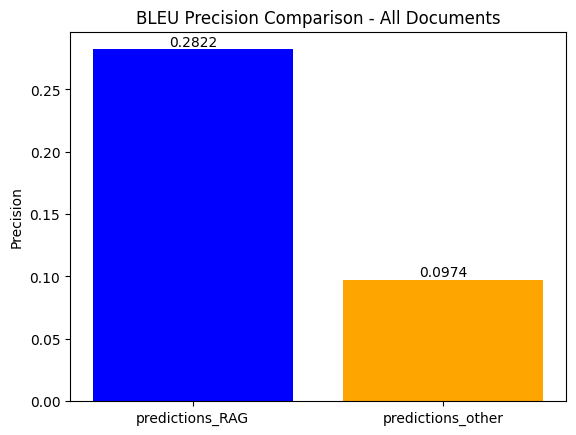

In [86]:
import evaluate
import matplotlib.pyplot as plt

bleu = evaluate.load("bleu")

# Assuming 'predictions_rag', 'predictions_other', and 'references' are lists of strings
references_str = [' '.join(reference) for reference in references]
predictions_rag_str = [' '.join(prediction) for prediction in predictions_rag]
predictions_other_str = [' '.join(prediction) for prediction in predictions_other]

# Calculate BLEU precision for predictions_rag
results_rag = bleu.compute(predictions=predictions_rag_str, references=references_str)
precision_rag = results_rag['precisions'][0]

# Calculate BLEU precision for predictions_other
results_other = bleu.compute(predictions=predictions_other_str, references=references_str)
precision_other = results_other['precisions'][0]

# Visualize the precision values
labels = ['predictions_RAG', 'predictions_other']
precision_values = [precision_rag, precision_other]

fig, ax = plt.subplots()
bars = ax.bar(labels, precision_values, color=['blue', 'orange'])
ax.set_ylabel('Precision')
ax.set_title('BLEU Precision Comparison - All Documents')

# Annotate bars with values
for bar, v in zip(bars, precision_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{v:.4f}', ha='center', va='bottom')

plt.show()
